<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Adolfo Fuentes </em><br>

</div>

### **Tarea Final. Ciencia de Redes**

*11 de Enero de 2025*

#### Integrantes: 
` Gabriel Álvarez, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

# Objetivos:

Se trabajará con los datos de servicios y destinos turísticos de la región de los Ríos. El objetivo principal del trabajo es construir, analizar y extraer información valiosa de una red bipartita basada en datos de visitas turísticas de la región de Los Ríos, con un enfoque en la inferencia de patrones significativos.

El análisis de redes es una herramienta poderosa para, en este caso, comprender y modelar las relaciones complejas entre usuarios y destinos turísticos. 

Para el análisis, será importante considerar lo siguiente:

#### Análisis Exploratorio de Datos:

- Explorar y describir el conjunto de datos utilizando herramientas estadísticas y visuales: histogramas, analizar relaciones bivariadas entre variables relevantes, calcular y visualizazr correlaciones entre las variables.

#### Inferencia de la Red:

- Construir una red bipartita que conecte usuarios y destinos turísticos, donde los enlaces reflejen interacciones como visitas o calificaciones.

- Generar proyecciones unimodales de la red bipartita, para analizar usuarios conectados por destintos compartidos o analizar destinos conectados por  usuarios comunes.

- Aplicar modelos nulos para filtrar relaciones débiles, asegurando que las conexiones retenidas sean estadísticamente significativas.

#### Descripción de la Red:

- Caracterizar la red original y las redes proyectadas mediante:

      - Distribución de grados antes y después de filtrar
      - Calcular el coeficiente de clustering para evaluar la cohesión de la red
      - Medir densidad y número de nodos y enlaces de la red
  
- Detectar comunidades dentro de las redes proyectadas utilizando algoritmos de modularidad, analizando sus características y posibles implicancias.

#### Identificación de Patrones en la Red:

- Identificar patrones relevantes en la red proyectada, como nodos clave (hubs) o centralidad, relaciones frecuentes entre destinos turísticos que indiquen co-visitas significativas.

- Analizar las comunidades detectadas para entender preferencias compartidas entre usuarios.

#### Objetivo Final

- Evaluar cómo los patrones y métricas extraídos de la red pueden aplicarse en la creación de sistemas de recomendación personalizados para los usuarios.

- Proponer estrategias basadas en los hallazgos para optimizar la gestión turística, fomentar la diversificación de destinos y promover la sostenibilidad en el sector.


# Motivación

<div style="text-align: justify;">
Anexo: Contexto y Motivación de Datos de Destinos y Servicios Turísticos:  
El turismo es un motor esencial para el desarrollo sostenible, impulsando el progreso hacia los Objetivos de Desarrollo Sostenible (ODS) de las Naciones Unidas a través del crecimiento económico, la preservación cultural y la gestión ambiental. No obstante, la pandemia de COVID-19 afectó profundamente a la industria turística global, creando desafíos sin precedentes en toda la cadena de valor. Aunque se ha observado una recuperación parcial, los niveles de actividad turística previos a la pandemia aún no se han alcanzado completamente.<br><br>

En este escenario, la industria turística de Chile destaca por su significativa contribución a la economía nacional y por sus logros en turismo sostenible y de aventura. Reconocido internacionalmente en los World Travel Awards 2023, Chile se ha posicionado como un destino preferido para viajeros eco-conscientes y aventureros. Sin embargo, para mantener y potenciar esta ventaja competitiva en la era pospandemia, es crucial adoptar tecnologías innovadoras que mejoren y personalicen las experiencias turísticas.<br><br>

La transformación digital y la integración de la inteligencia artificial (IA) permiten a las empresas turísticas obtener profundos insights sobre las preferencias y comportamientos de los viajeros. Los sistemas de recomendación, alimentados por reseñas y calificaciones en línea, juegan un papel crucial al influir en las decisiones de los clientes y mejorar los servicios ofrecidos. Estos sistemas personalizados no solo aumentan la satisfacción del cliente, sino que también promueven prácticas turísticas responsables al alinearse con los valores y motivaciones de los viajeros.<br><br>

Construir una red de Destinos Turísticos y de Servicios turísticos nos permite mapear qué actividades económicas relacionadas tienden a agruparse, lo que es esencial para comprender los patrones de clustering y co-ubicación o co-visita de los servicios turísticos. Un análisis de esta naturaleza puede contribuir al desarrollo económico y social de las comunidades locales, alineándose con los ODS y fortaleciendo la posición de Chile como líder en turismo sostenible. </div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import math
import nltk
import string
from itertools import compress
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

## 1. Análisis Exploratorio de Datos:

In [2]:
df_base = pd.read_excel("./data/consolidado_reviews_Los_Rios.xlsx").reset_index()
df_base = df_base.rename({'index':'Id'}, axis='columns')

In [3]:
df_base

,Id,N,place_id,name,id_review,user_name,id_usuario,stars,link_review,fecha,review
0,0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYbzgzN29BRRAB,angie cardona,103326493536057771398,5,https://www.google.com/maps/contrib/1033264935...,2024-10-30T17:50:02.384466,"Excelente atención, la comida fue deliciosa!! ..."
1,1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYMmJPampnRRAB,Fabian Aruani,117348510194376829755,3,https://www.google.com/maps/contrib/1173485101...,2024-10-29T11:17:02.664924,NaN
2,2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChZDSUhNMG9nS0VJQ0FnSURYb01lUkFREAE,Nataniel Lavado,115312318540115775891,5,https://www.google.com/maps/contrib/1153123185...,2024-10-22T20:31:57.541034,Atendido por sus dueños exelente
3,3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYLTdiY2tBRRAB,Leonardo Enrique García Riquelme,100519139671583772741,4,https://www.google.com/maps/contrib/1005191396...,2024-10-21T02:57:42.891824,NaN
4,4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYdTdlYTZBRRAB,Andres Herrera,117104494720799796058,5,https://www.google.com/maps/contrib/1171044947...,2024-10-21T01:39:11.791360,NaN
...,...,...,...,...,...,...,...,...,...,...,...
479338,479338,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,ChdDSUhNMG9nS0VJQ0FnSUNWcWVxeDZnRRAB,camilo jaramillo,115357724017509666615,5,https://www.google.com/maps/reviews/data=!4m8!...,2023-12-07T23:48:07.565Z,NaN
479339,479339,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,ChdDSUhNMG9nS0VJQ0FnSUNsamFDcHNnRRAB,Cesar Subiabre,104537270371295637501,5,https://www.google.com/maps/reviews/data=!4m8!...,2023-11-24T00:31:52.856Z,NaN
479340,479340,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,ChRDSUhNMG9nS0VJQ0FnSUNscnZRdhAB,Maxito Sandoval,112848686082813550489,5,https://www.google.com/maps/reviews/data=!4m8!...,2023-11-18T18:33:52.495Z,NaN
479341,479341,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,ChZDSUhNMG9nS0VJQ0FnSUNscU5QdkRnEAE,Diego Bustos,107280792151652979861,5,https://www.google.com/maps/reviews/data=!4m8!...,2023-11-13T14:16:28.916Z,Un lugar increíble para ver el paisaje y obser...


- **Id**: es el identificador único asignado a cada review de la base de datos. **En total hay 479.343 reviews**
- **N**: es el identificador numérico único asignado a cada lugar que cuenta con reviews en Google Maps.
- **place_id**: es el identificador único asignado a cada lugar que cuenta con reviews en Google Maps.
- **name**: es el nombre único que corresponde a cada lugar que cuenta con al menos una review en Google Maps.
- **id_review**: corresponde a la identificación única de la review realizada en Google Maps.
- **user name**: es el nombre del usuario que realiza al menos una review en Google Maps.
- **id_usuario**: es el identificador único asignado a cada usuario que ha realizado al menos un review en Google Maps.
- **stars**: es la valoración general del lugar en una escala de estrellas en Google Maps, donde 1 es la más baja y 5 es la más alta.
- **link_review**: es el link que lleva a la review realizada por un usuario en Google Maps.
- **fecha**: es la fecha en que se realizó la review en Google Maps.
- **review**: es el texto que realiza una persona para comentar su experiencia en un lugar específico en Google Maps.

In [4]:
df_base.head(2)


,Id,N,place_id,name,id_review,user_name,id_usuario,stars,link_review,fecha,review
0,0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYbzgzN29BRRAB,angie cardona,103326493536057771398,5,https://www.google.com/maps/contrib/1033264935...,2024-10-30T17:50:02.384466,"Excelente atención, la comida fue deliciosa!! ..."
1,1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYMmJPampnRRAB,Fabian Aruani,117348510194376829755,3,https://www.google.com/maps/contrib/1173485101...,2024-10-29T11:17:02.664924,NaN


In [12]:
df_base.columns

Index(['Id', 'N', 'place_id', 'name', 'id_review', 'user_name', 'id_usuario',
       'stars', 'link_review', 'fecha', 'review'],
      dtype='object')

In [13]:
print('Cantidad de Reviews: '+str(len(df_base)))
print('Cantidad de Comentarios: ' + str(len(df_base['review'].dropna())))
print('Cantidad de Valoraciones: ' + str(len(df_base['stars'].dropna())))
print('Diferencia (Valoraciones - Comentarios): ' + str(len(df_base['stars'].dropna()) - len(df_base['review'].dropna())))
print('Cantidad de Lugares: '+ str(len(df_base['place_id'].unique())))
print('Cantidad de usuarios únicos: '+str(len(df_base['id_usuario'].unique())))

Cantidad de Reviews: 479343
Cantidad de Comentarios: 233588
Cantidad de Valoraciones: 479343
Diferencia (Valoraciones - Comentarios): 245755
Cantidad de Lugares: 1390
Cantidad de usuarios únicos: 205836


En esta base de datos encontramos **479,343 reviews**, de las cuales obtenemos **233,588** reviews con comentarios y **245,755** reviews solo con valoración de estrellas (sin comentarios). Los usuarios únicos son **205,836** y los lugares valorizados en Google Maps son **1,390**.  

- **Cantidad de Reviews**: 479,343  
- **Cantidad de Comentarios**: 233,588  
- **Cantidad de Lugares**: 1,390  
- **Cantidad de Usuarios Únicos**: 205,836  

## 2. Ingeniería de Datos:
### 2.1 Asignación de formato datetime

In [14]:
# Convertir la columna de fecha a tipo datetime manejando errores y formato específico
df_base['fecha'] = pd.to_datetime(df_base['fecha'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

# Crear nuevas columnas
df_base['year'] = df_base['fecha'].dt.year
df_base['month'] = df_base['fecha'].dt.month
df_base['day'] = df_base['fecha'].dt.day
df_base['time'] = df_base['fecha'].dt.time

# Verificar las primeras filas
print(df_base[['fecha', 'year', 'month', 'day', 'time']].head())

  fecha  year  month  day time
0   NaT   NaN    NaN  NaN  NaT
1   NaT   NaN    NaN  NaN  NaT
2   NaT   NaN    NaN  NaN  NaT
3   NaT   NaN    NaN  NaN  NaT
4   NaT   NaN    NaN  NaN  NaT


Se obsevan valores Nulos por lo que se deben trabajar

In [15]:
# Cantidad de valores nulos (NaN o NaT) en la columna 'fecha'
nan_count = df_base['fecha'].isna().sum()

# Cantidad de valores no nulos (válidos) en la columna 'fecha'
not_nan_count = df_base['fecha'].notna().sum()

# Imprimir resultados
print(f"Cantidad de valores NaN/NaT en 'fecha': {nan_count}")
print(f"Cantidad de valores válidos en 'fecha': {not_nan_count}")

Cantidad de valores NaN/NaT en 'fecha': 32993
Cantidad de valores válidos en 'fecha': 446350


In [16]:
# Filtrar filas donde 'fecha' es NaN/NaT
nan_fecha = df_base[df_base['fecha'].isna()]

# Contar cuántas de esas filas tienen datos en 'review'
datos_en_review = nan_fecha['review'].notna().sum()

# Imprimir resultados
print(f"Cantidad de valores NaN/NaT en 'fecha': {len(nan_fecha)}")
print(f"De ellos, cantidad de datos en 'review': {datos_en_review}")

Cantidad de valores NaN/NaT en 'fecha': 32993
De ellos, cantidad de datos en 'review': 16320


Dado que una gran parte de los valores nulos tienen "review" se decide rellenar los NaN o NaT buscando cada id_usuario y otras reviews que haya realizado.

In [17]:
# Crear una función para rellenar valores NaN/NaT basados en id_usuario
def rellenar_fecha_por_usuario(df, columnas_fecha, id_col):
    for col in columnas_fecha:
        # Rellenar valores NaN basándose en el promedio de la columna por id_usuario
        df[col] = df.groupby(id_col)[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    return df

# Columnas de fecha que necesitan ser rellenadas
columnas_fecha = ['year', 'month', 'day']

# Aplicar la función al DataFrame
df_base = rellenar_fecha_por_usuario(df_base, columnas_fecha, 'id_usuario')

# Verificar el resultado
print(df_base[['id_usuario', 'year', 'month', 'day']].head())

              id_usuario    year  month   day
0  103326493536057771398     NaN    NaN   NaN
1  117348510194376829755     NaN    NaN   NaN
2  115312318540115775891     NaN    NaN   NaN
3  100519139671583772741  2022.0    1.0  26.0
4  117104494720799796058     NaN    NaN   NaN


In [19]:
# Contar valores NaN en cada columna relacionada con la fecha
nan_count = df_base[['year', 'month', 'day']].isna().sum()

# Imprimir resultados
print("Cantidad de valores NaN restantes por columna:")
print(nan_count)

Cantidad de valores NaN restantes por columna:
year     0
month    0
day      0
dtype: int64


Los valores aún faltantes, se rellenan utilizando la mediana para cada variable.

In [18]:
# Función para rellenar NaN con la mediana por place_id
def rellenar_fecha_por_place_id(df, columnas_fecha, place_col):
    for col in columnas_fecha:
        # Rellenar valores NaN con la mediana del grupo por place_id
        df[col] = df.groupby(place_col)[col].transform(lambda x: x.fillna(x.median()))
    return df

# Columnas de fecha que necesitan ser rellenadas
columnas_fecha = ['year', 'month', 'day']

# Aplicar la función al DataFrame
df_base = rellenar_fecha_por_place_id(df_base, columnas_fecha, 'place_id')

# Verificar el resultado
print("Cantidad de valores NaN restantes por columna después del rellenado:")
print(df_base[columnas_fecha].isna().sum())


Cantidad de valores NaN restantes por columna después del rellenado:
year     0
month    0
day      0
dtype: int64


In [27]:
# Verificar si quedan NaN y reemplazarlos con un valor predeterminado (opcional)

df_base.fillna({'year': 0, 'month': 1, 'day': 1}, inplace=True)


# Convertir las columnas de fecha a tipo entero
df_base[['year', 'month', 'day']] = df_base[['year', 'month', 'day']].astype(int)


# Verificar el resultado
print(df_base[['year', 'month', 'day']].dtypes)
df_base[['year', 'month', 'day']].head()

year     int64
month    int64
day      int64
dtype: object


,year,month,day
0,2020,3,15
1,2020,3,15
2,2020,3,15
3,2022,1,26
4,2020,3,15


Se decide rellenar los NaN o NaT buscando cada id_usuario y otras reviews que haya realizado.

In [20]:
df_base.head()

,Id,N,place_id,name,id_review,user_name,id_usuario,stars,link_review,fecha,review,year,month,day,time
0,0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYbzgzN29BRRAB,angie cardona,103326493536057771398,5,https://www.google.com/maps/contrib/1033264935...,NaT,"Excelente atención, la comida fue deliciosa!! ...",2020.0,3.0,15.0,NaT
1,1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYMmJPampnRRAB,Fabian Aruani,117348510194376829755,3,https://www.google.com/maps/contrib/1173485101...,NaT,NaN,2020.0,3.0,15.0,NaT
2,2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChZDSUhNMG9nS0VJQ0FnSURYb01lUkFREAE,Nataniel Lavado,115312318540115775891,5,https://www.google.com/maps/contrib/1153123185...,NaT,Atendido por sus dueños exelente,2020.0,3.0,15.0,NaT
3,3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYLTdiY2tBRRAB,Leonardo Enrique García Riquelme,100519139671583772741,4,https://www.google.com/maps/contrib/1005191396...,NaT,NaN,2022.0,1.0,26.0,NaT
4,4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYdTdlYTZBRRAB,Andres Herrera,117104494720799796058,5,https://www.google.com/maps/contrib/1171044947...,NaT,NaN,2020.0,3.0,15.0,NaT


Se visualizan las columnas para ver cual de ellas se eliminaran.

In [30]:
df_base.columns

Index(['Id', 'N', 'place_id', 'name', 'id_review', 'user_name', 'id_usuario',
       'stars', 'link_review', 'fecha', 'review', 'year', 'month', 'day',
       'time'],
      dtype='object')

Se decide eliminar:
- user_name, pues es redundante al id_usuario
- day y time, ya que no son necesarios para el análisis a realizar
- link_review, es innecesario para el análisis
- id: redundante al indice
- id_review: No utilizado

In [31]:
# 3. Eliminar columnas innecesarias: 'user_name', 'day', 'time', 'link_review', 'id', 'id_review'
df_base = df_base.drop(columns=['user_name', 'day', 'time', 'link_review', 'Id', 'fecha','id_review'])

# 4. Renombrar la columna 'name' a 'place_name'
df_base = df_base.rename(columns={'name': 'place_name'})

# 5. Incorporar una columna 'rating' que sea el promedio de 'stars' por 'place_id'
df_base['rating'] = df_base.groupby('place_id')['stars'].transform('mean')

# 6. Resetear el índice para que sea un número consecutivo
df_base = df_base.reset_index(drop=True)

# Verificar el resultado
df_base.head()


,N,place_id,place_name,id_usuario,stars,review,year,month,rating
0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,103326493536057771398,5,"Excelente atención, la comida fue deliciosa!! ...",2020,3,3.860717
1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117348510194376829755,3,NaN,2020,3,3.860717
2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,115312318540115775891,5,Atendido por sus dueños exelente,2020,3,3.860717
3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,100519139671583772741,4,NaN,2022,1,3.860717
4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117104494720799796058,5,NaN,2020,3,3.860717


In [ ]:
# Guardar el DataFrame en un archivo Excel
df_base.to_excel("./data/reviews_Los_Rios.xlsx", index=False)

print("El nuevo dataset se ha guardado como 'reviews_Los_Rios.xlsx'.")

In [ ]:
list_placeids = df_base['place_id'].unique()
print(len(list_placeids))
print(len(df_base['id_usuario'].unique()))

## 3. Enriquecimiento de los datos


In [ ]:
import requests
import pandas as pd

API_KEY = "xx" 
list_placeids = df_base['place_id'].unique()  # Lista única de place_id desde el DataFrame


### 3.1 Geocoding


#### Buscar las coordenadas de un place_id con la API de Google Maps: Geocoding

In [ ]:
# Función para obtener geocodificación por place_id
def get_geocode(api_key, place_id):
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"place_id": place_id, "key": api_key}
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data.get("results"):
            result = data["results"][0]
            latitude = result["geometry"]["location"]["lat"]
            longitude = result["geometry"]["location"]["lng"]
            return {
                "latitude": latitude,
                "longitude": longitude
            }
        else:
            return {"error": "No se encontraron resultados"}
    else:
        return {"error": f"Error en la solicitud: {response.status_code}"}

# Lista de place_ids únicos desde el DataFrame
list_placeids = df_base['place_id'].unique()

# Agregar columnas para coordenadas al DataFrame
df_base['Latitud'] = None
df_base['Longitud'] = None

# Llenar coordenadas por place_id
for place_id in list_placeids:
    resultado = get_geocode(API_KEY, place_id)
    if "error" in resultado:
        print(f"Error para {place_id}: {resultado['error']}")
    else:
        df_base.loc[df_base['place_id'] == place_id, 'Latitud'] = resultado["latitude"]
        df_base.loc[df_base['place_id'] == place_id, 'Longitud'] = resultado["longitude"]

Error para ChIJz5dvdE9DFpYRAzONxAT0Qrk: No se encontraron resultados
Error para ChIJoTdoGVV1PZYRGf483bWJ2YI: No se encontraron resultados
Error para ChIJ2VZ5pWMysmYRMR5WVfBDy7A: No se encontraron resultados
Error para ChIJbwCrUkiBE5YRdU1YSjs46fM: No se encontraron resultados
Error para ChIJGStsmnu-FpYRqI4LZzhkxzI: No se encontraron resultados


### 3.2 Places

In [ ]:
# Función para obtener detalles de un lugar por place_id
def get_place_details(api_key, place_id):
    url = "https://maps.googleapis.com/maps/api/place/details/json"
    params = {"place_id": place_id, "key": api_key}
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if "result" in data:
            result = data["result"]
            types = result.get("types", [])  # Tipos/categorías del lugar
            address_components = result.get("address_components", [])
            city = None
            
            # Buscar la ciudad entre los componentes de dirección
            for component in address_components:
                if "locality" in component["types"]:
                    city = component["long_name"]
                    break
            
            return {
                "types": types,
                "city": city
            }
        else:
            return {"error": "No se encontraron resultados"}
    else:
        return {"error": f"Error en la solicitud: {response.status_code}"}

# Lista de place_ids únicos
list_placeids = df_base['place_id'].unique()

# Agregar columnas para tipo, subtipos y ciudad
df_base['types'] = None
df_base['city'] = None

# Obtener información para cada place_id
for place_id in list_placeids:
    resultado = get_place_details(API_KEY, place_id)
    if "error" in resultado:
        print(f"Error para {place_id}: {resultado['error']}")
    else:
        types = ", ".join(resultado["types"]) if resultado["types"] else None
        city = resultado["city"]
        df_base.loc[df_base['place_id'] == place_id, 'types'] = types
        df_base.loc[df_base['place_id'] == place_id, 'city'] = city


Error para ChIJz5dvdE9DFpYRAzONxAT0Qrk: No se encontraron resultados
Error para ChIJoTdoGVV1PZYRGf483bWJ2YI: No se encontraron resultados
Error para ChIJ2VZ5pWMysmYRMR5WVfBDy7A: No se encontraron resultados
Error para ChIJbwCrUkiBE5YRdU1YSjs46fM: No se encontraron resultados
Error para ChIJGStsmnu-FpYRqI4LZzhkxzI: No se encontraron resultados


In [ ]:
df_base.head()

,N,place_id,place_name,id_usuario,stars,review,year,month,rating,Latitud,Longitud,types,city
0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,103326493536057771398,5,"Excelente atención, la comida fue deliciosa!! ...",2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli
1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117348510194376829755,3,NaN,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli
2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,115312318540115775891,5,Atendido por sus dueños exelente,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli
3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,100519139671583772741,4,NaN,2022,1,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli
4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117104494720799796058,5,NaN,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli


In [ ]:
# Ver los valores únicos en la columna 'types'
unique_types = df_base['types'].unique()

# Mostrar los resultados
print("Valores únicos en 'types':")
print(unique_types)


Valores únicos en 'types':
['restaurant, food, point_of_interest, establishment'
 'spa, lodging, travel_agency, point_of_interest, establishment'
 'restaurant, point_of_interest, food, establishment'
 'park, tourist_attraction, point_of_interest, establishment'
 'natural_feature, establishment'
 'lodging, point_of_interest, establishment'
 'bar, restaurant, food, point_of_interest, establishment'
 'tourist_attraction, spa, point_of_interest, establishment'
 'tourist_attraction, point_of_interest, establishment'
 'spa, point_of_interest, establishment'
 'point_of_interest, establishment'
 'lodging, travel_agency, point_of_interest, establishment'
 'lodging, spa, restaurant, food, point_of_interest, establishment'
 'bar, point_of_interest, establishment'
 'bakery, store, food, point_of_interest, establishment'
 'store, food, point_of_interest, establishment'
 'park, point_of_interest, establishment'
 'tourist_attraction, park, point_of_interest, establishment'
 'liquor_store, store, poin

In [ ]:
# Dividir la columna 'types' en varias partes separadas por comas
df_base[['category', 'type', 'subtype']] = df_base['types'].str.split(',', n=2, expand=True)

# Eliminar espacios adicionales si los hay
df_base['category'] = df_base['category'].str.strip()
df_base['type'] = df_base['type'].str.strip()
df_base['subtype'] = df_base['subtype'].str.strip()

# Verificar el resultado
print(df_base[['types', 'category', 'type', 'subtype']].head())

df_base.head()

                                               types    category  type  \
0  restaurant, food, point_of_interest, establish...  restaurant  food   
1  restaurant, food, point_of_interest, establish...  restaurant  food   
2  restaurant, food, point_of_interest, establish...  restaurant  food   
3  restaurant, food, point_of_interest, establish...  restaurant  food   
4  restaurant, food, point_of_interest, establish...  restaurant  food   

                            subtype  
0  point_of_interest, establishment  
1  point_of_interest, establishment  
2  point_of_interest, establishment  
3  point_of_interest, establishment  
4  point_of_interest, establishment  


,N,place_id,place_name,id_usuario,stars,review,year,month,rating,Latitud,Longitud,types,city,category,type,subtype
0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,103326493536057771398,5,"Excelente atención, la comida fue deliciosa!! ...",2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117348510194376829755,3,NaN,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,115312318540115775891,5,Atendido por sus dueños exelente,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,100519139671583772741,4,NaN,2022,1,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,117104494720799796058,5,NaN,2020,3,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"


## 4. Análisis Exploratorio:

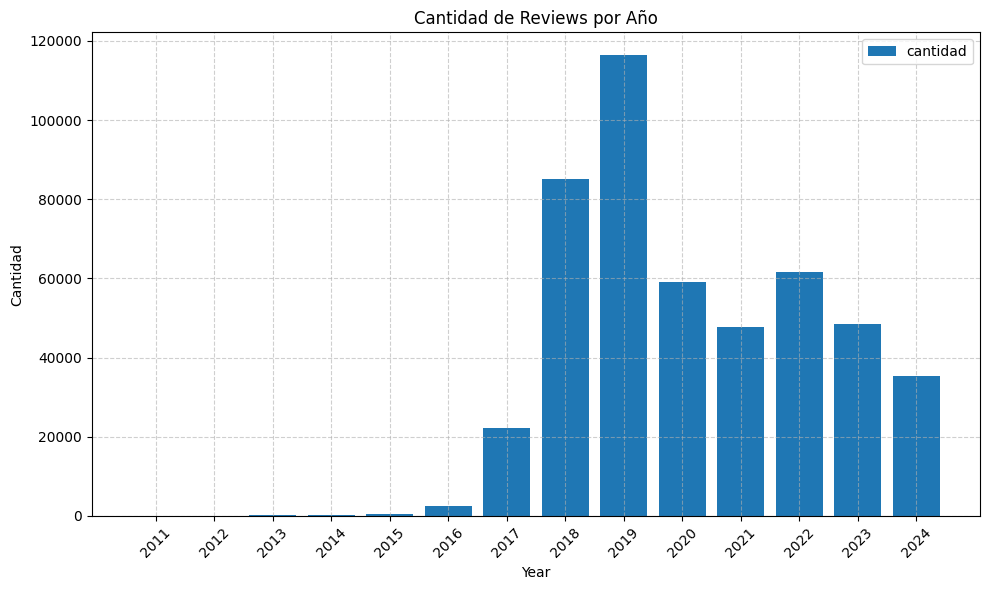

In [41]:
import matplotlib.pyplot as plt

# Agrupar por 'year' y contar la cantidad de registros (reviews) por año
reviews_per_year = df_base.groupby('year').size().reset_index(name='review')

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(reviews_per_year['year'], reviews_per_year['review'], label='cantidad')

# Personalización de la gráfica
plt.title('Cantidad de Reviews por Año')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(reviews_per_year['year'], rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()



Visualizamos la cantidad de reviews existentes por cada categoría, donde el ranking top 10 es el siguiente:

    1.Restaurant
    2. Tourist_attraction
    3. Point_of_interest
    4. Lodging
    5. Park
    6. Natural_feautre
    7. Bar
    8. Museum
    9. Food
    10. Shopping_mall


Top 10 lugares para la categoría 'restaurant':
                    place_name  cantidad
0    "La Cervecería" Kunstmann     19239
136         La Última Frontera      4414
23    Café Haussmann Isla teja      2641
16               Cafe Das Haus      2616
65                   El Bunker      2272
24                 Café Palace      2046
132       La Pizzeria de Renzo      1789
156             Mesa Incógnita      1604
1            AL YUGO RESTORANT      1576
208          Restaurant Igor's      1561

Top 10 lugares para la categoría 'tourist_attraction':
                                           place_name  cantidad
6   Encuentro Costumbrista en la Costa Playa Grand...     15349
21                         Parque Nacional Villarrica     10578
39                           Portal Salto Huilo Huilo      8259
61                                 Termas Geometricas      7428
4   Castillo San Sebastian de la Cruz, Corral. Sis...      6617
5                               Costanera Arturo Prat      46

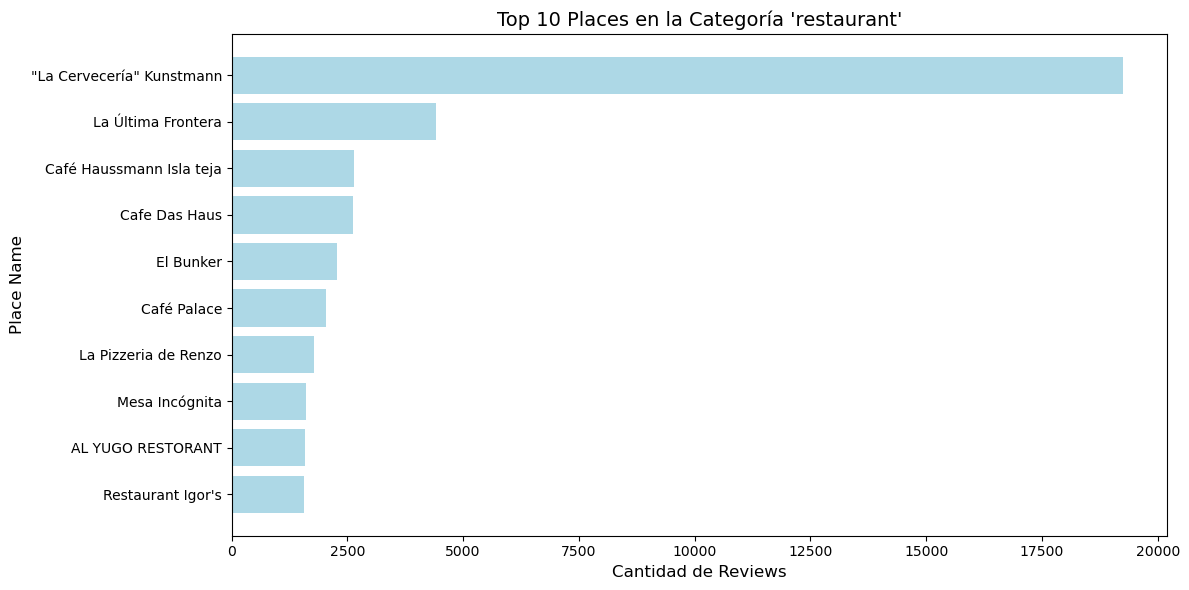

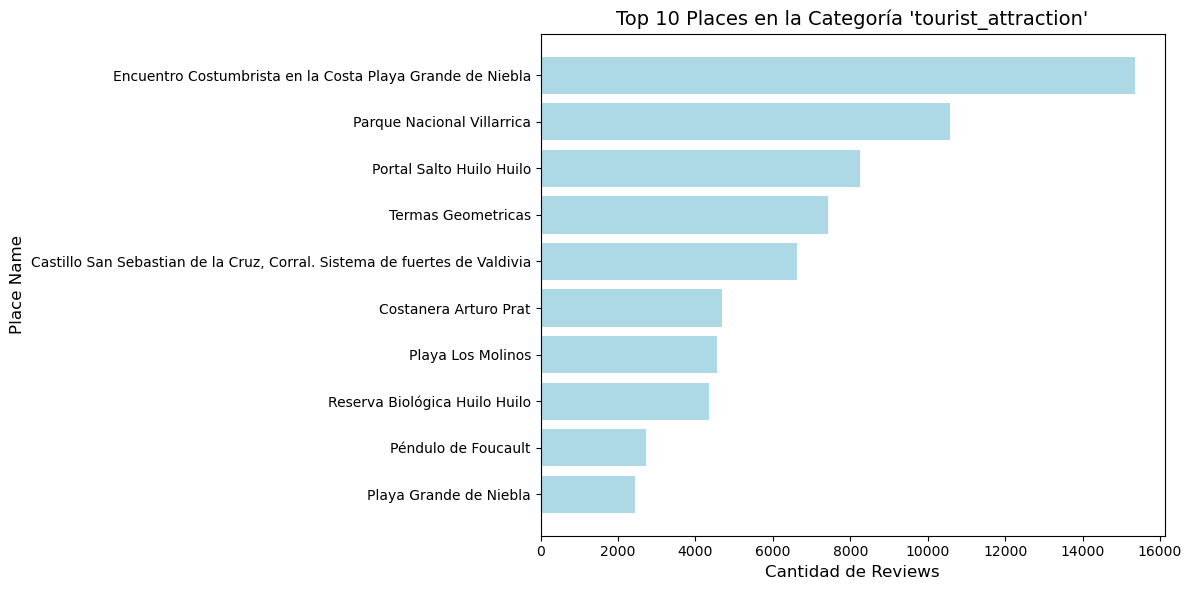

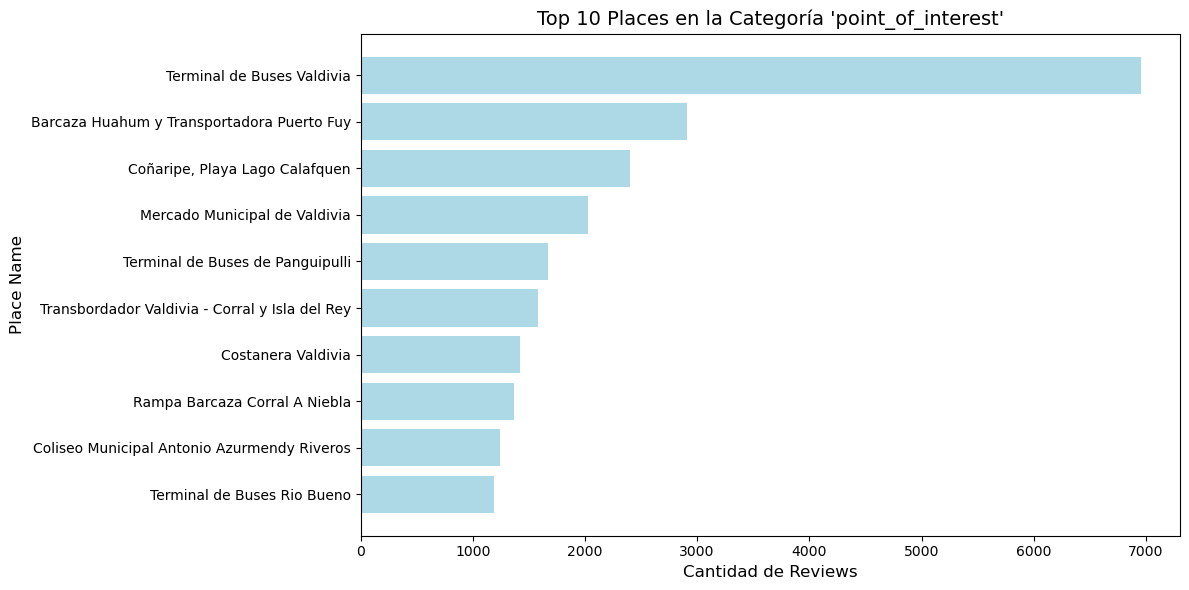

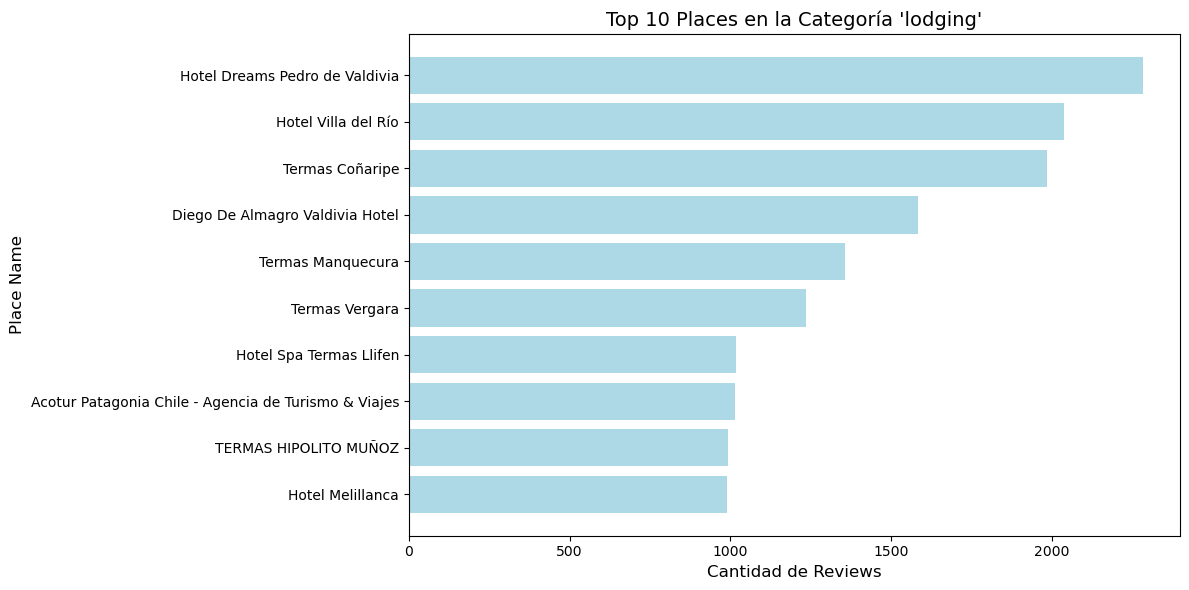

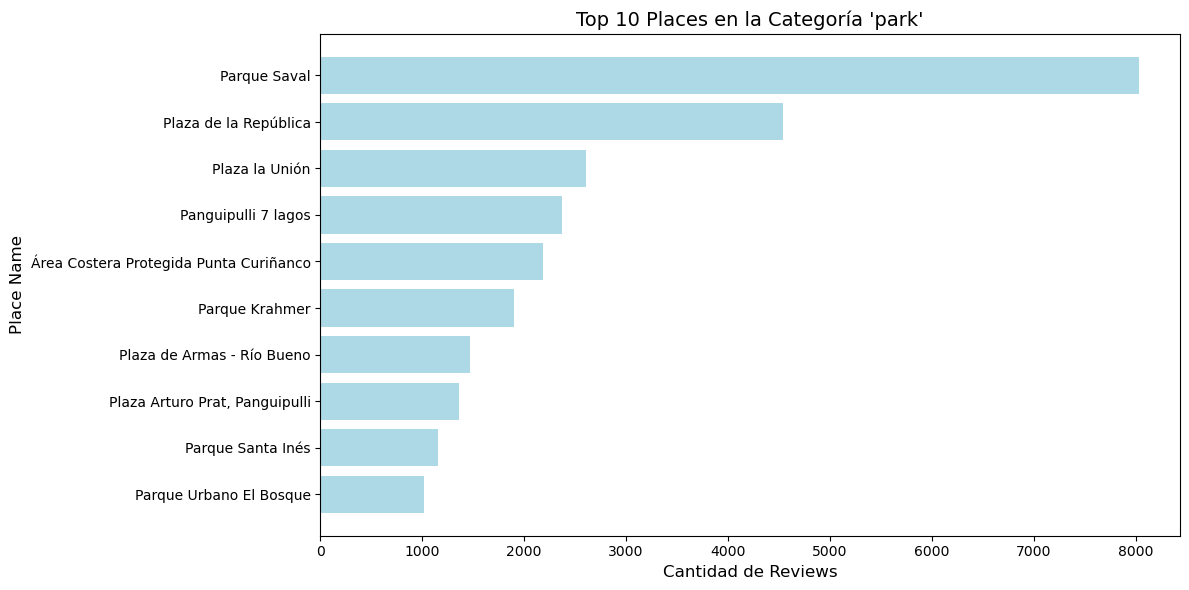

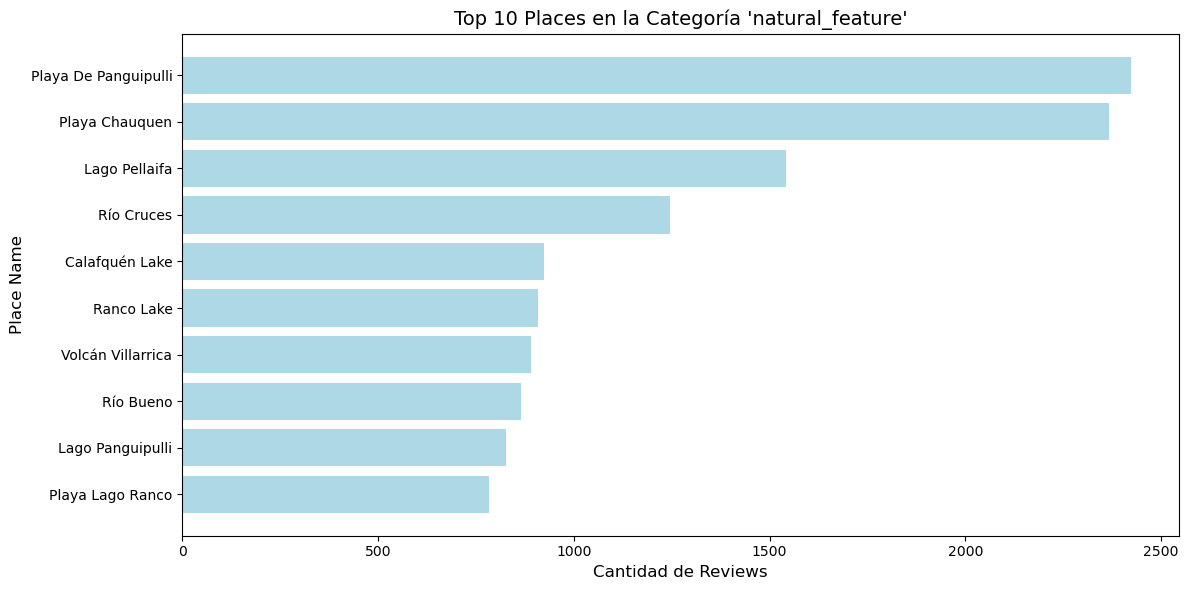

In [ ]:
# Categorías a analizar
categorias_filtradas = ['restaurant', 'tourist_attraction', 'point_of_interest', 'lodging', 'park', 'natural_feature']

# Crear un diccionario para almacenar el Top 10 por cada categoría
top_10_por_categoria = {}

for categoria in categorias_filtradas:
    # Filtrar el DataFrame por la categoría actual
    df_categoria = df_base[df_base['category'] == categoria]
    
    # Contar la cantidad de reviews por place_name
    top_places = df_categoria.groupby('place_name').size().reset_index(name='cantidad')
    
    # Ordenar por cantidad de reviews en orden descendente y seleccionar el Top 10
    top_10 = top_places.sort_values(by='cantidad', ascending=False).head(10)
    
    # Guardar el resultado en el diccionario
    top_10_por_categoria[categoria] = top_10

    # Mostrar el Top 10 de la categoría actual
    print(f"\nTop 10 lugares para la categoría '{categoria}':")
    print(top_10)

# Visualizar el resultado en gráficos separados
import matplotlib.pyplot as plt

for categoria, top_10 in top_10_por_categoria.items():
    plt.figure(figsize=(12, 6))
    plt.barh(top_10['place_name'], top_10['cantidad'], color='lightblue')
    plt.xlabel('Cantidad de Reviews', fontsize=12)
    plt.ylabel('Place Name', fontsize=12)
    plt.title(f"Top 10 Places en la Categoría '{categoria}'", fontsize=14)
    plt.gca().invert_yaxis()  # Lugar con más reviews en la parte superior
    plt.tight_layout()
    plt.show()


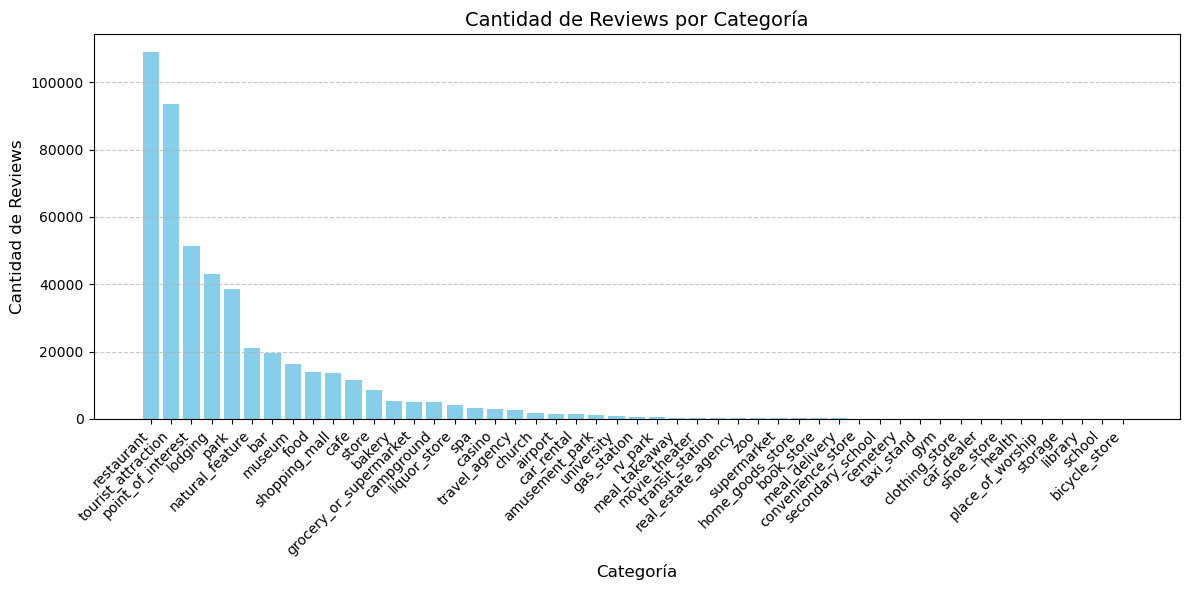

In [ ]:
# Agrupar por 'category' y contar la cantidad de registros (reviews) por categoría
reviews_per_category = df_base.groupby('category').size().reset_index(name='cantidad')

# Ordenar por cantidad para mejor visualización
reviews_per_category = reviews_per_category.sort_values(by='cantidad', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(reviews_per_category['category'], reviews_per_category['cantidad'], color='skyblue')

# Personalización de la gráfica
plt.title('Cantidad de Reviews por Categoría', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Del top 6, se busca analizar el top 10 de lugares con más reviews:

Top 10 lugares por cantidad de reviews en las categorías seleccionadas:
                                            place_name  cantidad
0                            "La Cervecería" Kunstmann     19239
268  Encuentro Costumbrista en la Costa Playa Grand...     15349
565                         Parque Nacional Villarrica     10578
658                           Portal Salto Huilo Huilo      8259
576                                       Parque Saval      8033
849                                 Termas Geometricas      7428
868                         Terminal de Buses Valdivia      6956
178  Castillo San Sebastian de la Cruz, Corral. Sis...      6617
219                              Costanera Arturo Prat      4696
624                                  Playa Los Molinos      4568


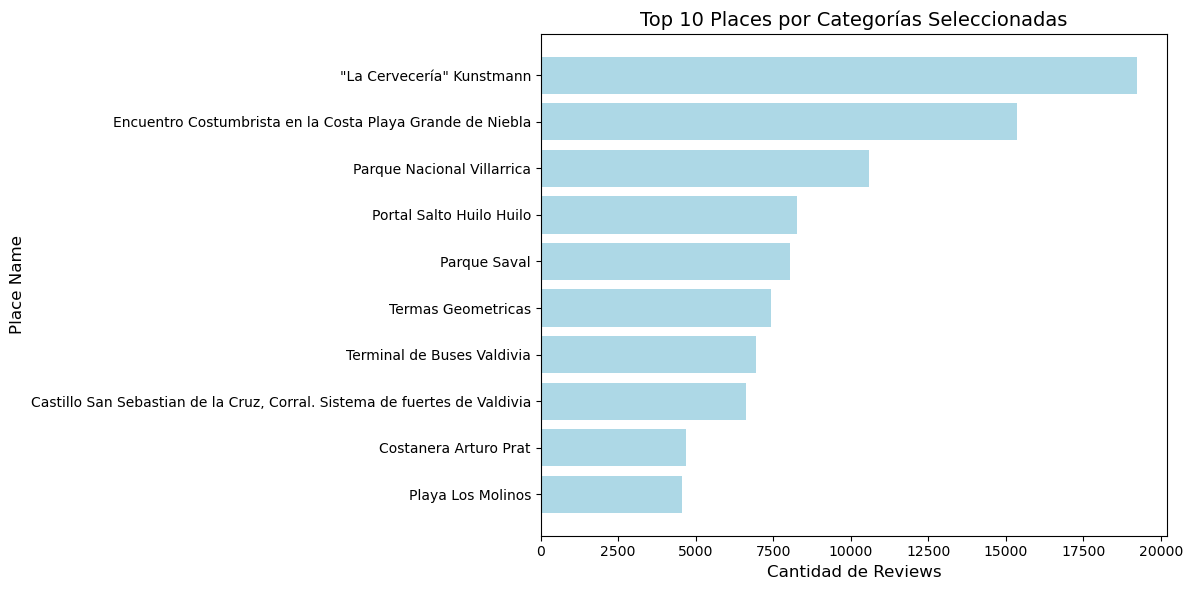

In [ ]:
# Filtrar el DataFrame para las categorías específicas
categorias_filtradas = ['restaurant', 'tourist_attraction', 'point_of_interest', 'lodging', 'park', 'natural_feature']
df_filtrado = df_base[df_base['category'].isin(categorias_filtradas)]

# Contar la cantidad de reviews por place_name
top_places = df_filtrado.groupby('place_name').size().reset_index(name='cantidad')

# Ordenar por cantidad de reviews en orden descendente
top_places = top_places.sort_values(by='cantidad', ascending=False)

# Seleccionar el Top 10
top_10_places = top_places.head(10)

# Mostrar el Top 10
print("Top 10 lugares por cantidad de reviews en las categorías seleccionadas:")
print(top_10_places)

# Visualización opcional en un gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_10_places['place_name'], top_10_places['cantidad'], color='lightblue')
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Place Name', fontsize=12)
plt.title('Top 10 Places por Categorías Seleccionadas', fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para que el lugar con más reviews esté arriba
plt.tight_layout()
plt.show()


Para poder trabajar la red, filtramos por los usuarios que han visitado más de 1 lugar:

In [44]:
# Contar cuántos lugares únicos ha visitado cada usuario
lugares_por_usuario = df_base.groupby('id_usuario')['place_name'].nunique()

# Calcular usuarios que han visitado más de 1 lugar
usuarios_mas_de_1_lugar = (lugares_por_usuario > 1).sum()

# Calcular usuarios que han visitado exactamente 1 lugar
usuarios_solo_1_lugar = (lugares_por_usuario == 1).sum()

# Mostrar los resultados
print(f"Usuarios que han visitado más de 1 lugar: {usuarios_mas_de_1_lugar}")
print(f"Usuarios que han visitado solo 1 lugar: {usuarios_solo_1_lugar}")


Usuarios que han visitado más de 1 lugar: 82983
Usuarios que han visitado solo 1 lugar: 122853


In [45]:
# Verificar si hay usuarios con 'place_name' nulo
usuarios_sin_visitas = df_base[df_base['place_name'].isna()]['id_usuario'].nunique()

# Mostrar el resultado
print(f"Cantidad de usuarios que no han visitado ningún lugar: {usuarios_sin_visitas}")


Cantidad de usuarios que no han visitado ningún lugar: 0


In [46]:
# Contar cuántos lugares únicos ha visitado cada usuario
lugares_por_usuario = df_base.groupby('id_usuario')['place_name'].nunique()

# Identificar los usuarios que han visitado más de 1 lugar
usuarios_mas_de_1 = lugares_por_usuario[lugares_por_usuario > 1].index

# Crear un nuevo DataFrame con los usuarios que han visitado más de 1 lugar
nuevo_df = df_base[df_base['id_usuario'].isin(usuarios_mas_de_1)].copy()

# Verificar el resultado
print(f"Cantidad de usuarios en el nuevo dataset: {nuevo_df['id_usuario'].nunique()}")
print(f"Tamaño del nuevo dataset: {nuevo_df.shape}")


Cantidad de usuarios en el nuevo dataset: 82983
Tamaño del nuevo dataset: (356475, 11)


In [ ]:
# Guardar el nuevo dataset en Excel
# nuevo_df.to_excel("Redes_coocurrencia.xlsx", index=False)

print("El nuevo dataset se ha guardado como 'Redes_coocurrencia.xlsx'.")

In [47]:
df_base = pd.read_excel("./Redes_coocurrencia.xlsx").reset_index()
df_base = df_base.rename({'index':'Id'}, axis='columns')

In [48]:
df_base

,Id,N,place_id,place_name,id_usuario,stars,review,year,month,rating,Latitud,Longitud,types,city,category,type,subtype
0,0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,100519139671583772741,4,NaN,2022,1,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
1,1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,109529793672350533730,4,NaN,2024,10,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
2,2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,108007733954263341484,4,"Buena comida local en frente al lago, la vista...",2024,9,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
3,3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,113996591657578671885,1,"Pan frío, no había casi ningún plato, no había...",2024,2,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
4,4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,106995186101279939117,5,Grato lugar entre recónditos paisajes de nuest...,2024,8,3.860717,-39.873253,-71.890961,"restaurant, food, point_of_interest, establish...",Panguipulli,restaurant,food,"point_of_interest, establishment"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356470,356470,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,115357724017509666615,5,NaN,2023,12,4.600000,-39.857047,-73.236887,"park, point_of_interest, establishment",Valdivia,park,point_of_interest,establishment
356471,356471,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,104537270371295637501,5,NaN,2023,11,4.600000,-39.857047,-73.236887,"park, point_of_interest, establishment",Valdivia,park,point_of_interest,establishment
356472,356472,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,112848686082813550489,5,NaN,2023,11,4.600000,-39.857047,-73.236887,"park, point_of_interest, establishment",Valdivia,park,point_of_interest,establishment
356473,356473,1426,ChIJVUByRLjvFZYR6l2n1fKNaAQ,Bosque humedal Angachilla,107280792151652979861,5,Un lugar increíble para ver el paisaje y obser...,2023,11,4.600000,-39.857047,-73.236887,"park, point_of_interest, establishment",Valdivia,park,point_of_interest,establishment


#### Resumen Estadístico General

In [49]:
# Resumen estadístico general para variables numéricas
print("Resumen estadístico general:")
print(df_base.describe())

# Resumen para variables categóricas (frecuencia de valores únicos)
print("\nFrecuencia de valores únicos en variables categóricas:")
print(df_base.nunique())


Resumen estadístico general:
                  Id              N          stars           year  \
count  356475.000000  356475.000000  356475.000000  356475.000000   
mean   178237.000000     160.779611       4.496467    2020.183233   
std    102905.612942     233.357643       0.929819       2.029950   
min         0.000000       1.000000       1.000000    2011.000000   
25%     89118.500000      13.000000       4.000000    2019.000000   
50%    178237.000000      61.000000       5.000000    2020.000000   
75%    267355.500000     207.000000       5.000000    2022.000000   
max    356474.000000    1426.000000       5.000000    2024.000000   

               month         rating        Latitud       Longitud  
count  356475.000000  356475.000000  356340.000000  356340.000000  
mean        5.139654       4.473428     -39.841935     -72.967147  
std         3.651384       0.256018       0.181424       0.497309  
min         1.000000       2.113879     -40.614874     -73.681844  
25%      

In [50]:
# Cantidad de usuarios únicos
cantidad_usuarios = df_base['id_usuario'].nunique()
print(f"Cantidad de usuarios únicos: {cantidad_usuarios}")

# Cantidad de destinos únicos
cantidad_destinos = df_base['place_name'].nunique()
print(f"Cantidad de destinos únicos: {cantidad_destinos}")


Cantidad de usuarios únicos: 82983
Cantidad de destinos únicos: 1373


Los nodos principales de la red corresponden a los **usuarios** y a los **destinos**. En total contamos con :

    Cantidad de usuarios únicos: 82983
    Cantidad de destinos únicos: 1373

#### Distribución de reviews por Usuario y Lugar

In [51]:
# Reviews por usuario
reviews_por_usuario = df_base.groupby('id_usuario').size()
print("\nDistribución de reviews por usuario:")
print(reviews_por_usuario.describe())

# Reviews por destino
reviews_por_destino = df_base.groupby('place_name').size()
print("\nDistribución de reviews por destino:")
print(reviews_por_destino.describe())



Distribución de reviews por usuario:
count    82983.000000
mean         4.295759
std          4.477721
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        146.000000
dtype: float64

Distribución de reviews por destino:
count     1373.000000
mean       259.632192
std        826.830465
min          1.000000
25%         18.000000
50%         56.000000
75%        178.000000
max      13253.000000
dtype: float64


**Distribución de reviews por Usuario**:

`Count:` Hay un total de 82.983 usuarios en el dataset que han realizado reviews.

`Mean:` En promedio, cada usuario ha realizado 4.30 reviews.

`Std:` La desviación estándar es 4.48, lo que indica una dispersión significativa en la cantidad de reviews realizadas por los usuarios.

`Min:` El usuario con menos actividad realizó 1 review.

`Percentil 25%:` El 25% de los usuarios realizaron 2 reviews o menos.

`Percentil 50%`: El 50% de los usuarios realizaron 3 reviews o menos.

`Percentil 75%`: El 75% de los usuarios realizaron 5 reviews o menos.

`Max:` El usuario más activo realizó 146 reviews.

Podemos ver que la mayoría de los usuarios realiza pocas reviews, pero hay algunos usuarios que destacan por ser mucho más activos (outliers).

**Distribución de reviews por Destino**:

`Count:` Hay 1,373 destinos turísticos únicos en el dataset.

`Mean:` En promedio, cada destino ha recibido 259.63 reviews.

`Std:` La desviación estándar es 826.83, lo que indica que algunos destinos reciben muchas más reviews que otros.

`Min:` El destino menos visitado tiene 1 review.

`Percentil 25%:` El 25% de los destinos han recibido 18 reviews o menos.

`Percentil 50%:` El 50% de los destinos han recibido 56 reviews o menos.

`Percentil 75%:` El 75% de los destinos han recibido 178 reviews o menos.

`Max:` El destino más popular ha recibido 13,253 reviews.

Podemos ver que la distribución de reviews por destino es altamente desigual: algunos destinos son extremadamente populares (outliers), mientras que muchos reciben pocas visitas o calificaciones.

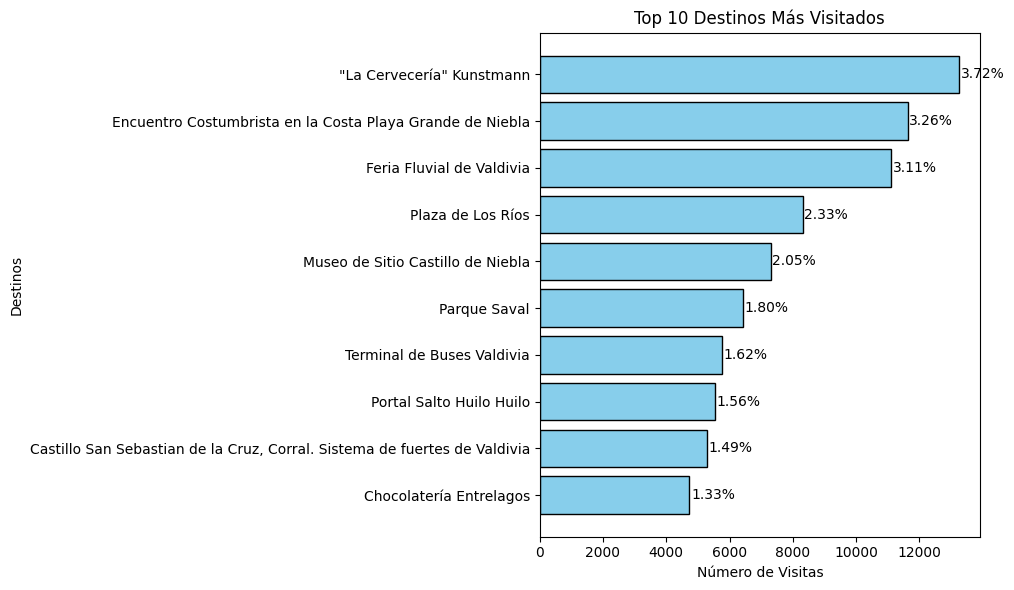

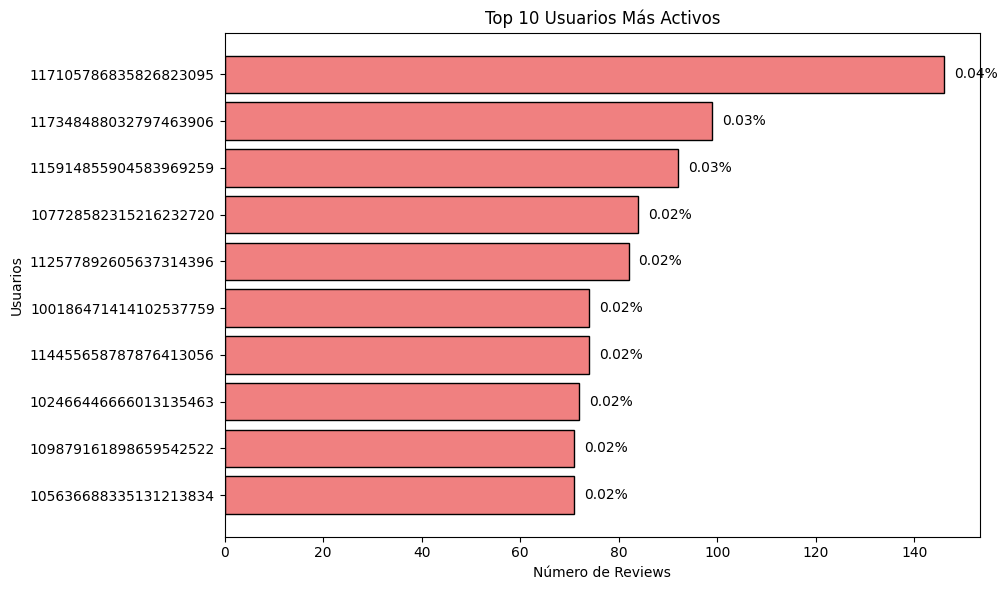

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_destinos_con_porcentaje['Destino'], top_destinos_con_porcentaje['Visitas'], color='skyblue', edgecolor='black')
plt.xlabel('Número de Visitas')
plt.ylabel('Destinos')
plt.title('Top 10 Destinos Más Visitados')
plt.gca().invert_yaxis()  # Colocar el destino más popular arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (visitas, porcentaje) in enumerate(zip(top_destinos_con_porcentaje['Visitas'], top_destinos_con_porcentaje['Porcentaje (%)'])):
    plt.text(visitas + 50, i, f"{porcentaje:.2f}%", va='center')

plt.show()



# Gráfico de barras horizontales para usuarios con más reviews
plt.figure(figsize=(10, 6))
plt.barh(top_usuarios_con_porcentaje['Usuario'], top_usuarios_con_porcentaje['Reviews'], color='lightcoral', edgecolor='black')
plt.xlabel('Número de Reviews')
plt.ylabel('Usuarios')
plt.title('Top 10 Usuarios Más Activos')
plt.gca().invert_yaxis()  # Colocar el usuario más activo arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (reviews, porcentaje) in enumerate(zip(top_usuarios_con_porcentaje['Reviews'], top_usuarios_con_porcentaje['Porcentaje (%)'])):
    plt.text(reviews + 2, i, f"{porcentaje:.2f}%", va='center')

plt.show()



#### Comportamiento de las calificaciones (stars)


Resumen de calificaciones (stars):
count    356475.000000
mean          4.496467
std           0.929819
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64


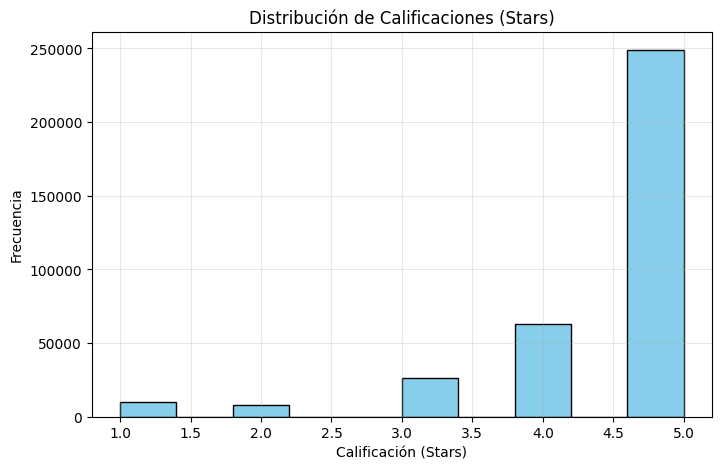

In [52]:
# Resumen de la variable 'stars'
print("\nResumen de calificaciones (stars):")
print(df_base['stars'].describe())

# Distribución de calificaciones
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_base['stars'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución de Calificaciones (Stars)")
plt.xlabel("Calificación (Stars)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


`Total de calificaciones:` Hay 356,475 reviews en total en el dataset.

`Calificación promedio:` La calificación promedio es 4.49, lo que sugiere que la mayoría de las evaluaciones son positivas.

`Desviación estándar (std):` La desviación estándar es 0.92, lo que indica que la mayoría de las calificaciones están cercanas al promedio, aunque hay algo de variabilidad.

`Mediana:` La calificación mediana es 5.0, lo que significa que al menos el 50% de las reviews tienen la calificación máxima.

`Mínimo:` La calificación más baja es 1.0, lo que indica que también hay destinos con evaluaciones muy negativas.

`Máximo:` La calificación más alta es 5.0, lo cual es esperado ya que las calificaciones están en una escala de 1 a 5.

La barra más alta corresponde a la calificación de 5.0, que tiene una frecuencia superior a 250,000 reviews, es la calificación más común en el dataset. Las calificaciones de 1.0, 2.0 y 3.0 tienen frecuencias mucho más bajas, por lo que podemos deducir que las reseñas negativas son menos comunes.

Con respecto a las evaluaciones positivas, podemos creer que pudiera haber un sesgo en los datos, donde solo usuarios satisfechos evaluan los lugares. Y en este sentido, creemos importante analizar en detalle los lugares con evaluaciones bajas que pudieran estar enfrentando problemas con la experiencia de los usuarios.

Al tener un alto número de evaluaciones positivas, también consideramos importante considerar métricas adicionales como la frecuencia de visitas y el tipo de comentarios que realizanm para poder afrontar un correcto sistema de recomendación.

#### Frecuencia de visitas para identificar los destinos más visitados y los usuarios más activos.

In [53]:
# Top 10 destinos más visitados con porcentaje
top_destinos = df_base['place_name'].value_counts().head(10)
total_visitas = df_base['place_name'].value_counts().sum()

# Agregar porcentaje al Top 10
top_destinos_porcentaje = top_destinos.apply(lambda x: (x / total_visitas) * 100)

# Mostrar resultados
print("\nTop 10 destinos más visitados con porcentaje del total:")
top_destinos_con_porcentaje = pd.DataFrame({
    'Destino': top_destinos.index,
    'Visitas': top_destinos.values,
    'Porcentaje (%)': top_destinos_porcentaje.values
})
print(top_destinos_con_porcentaje)

# Top 10 usuarios con más reviews
top_usuarios = df_base['id_usuario'].value_counts().head(10)
total_reviews = df_base['id_usuario'].value_counts().sum()

# Agregar porcentaje al Top 10
top_usuarios_porcentaje = top_usuarios.apply(lambda x: (x / total_reviews) * 100)

# Mostrar resultados
print("\nTop 10 usuarios con más reviews con porcentaje del total:")
top_usuarios_con_porcentaje = pd.DataFrame({
    'Usuario': top_usuarios.index,
    'Reviews': top_usuarios.values,
    'Porcentaje (%)': top_usuarios_porcentaje.values
})
print(top_usuarios_con_porcentaje)





Top 10 destinos más visitados con porcentaje del total:
                                             Destino  Visitas  Porcentaje (%)
0                          "La Cervecería" Kunstmann    13253        3.717792
1  Encuentro Costumbrista en la Costa Playa Grand...    11630        3.262501
2                          Feria Fluvial de Valdivia    11103        3.114664
3                                  Plaza de Los Ríos     8311        2.331440
4                  Museo de Sitio Castillo de Niebla     7307        2.049793
5                                       Parque Saval     6433        1.804615
6                         Terminal de Buses Valdivia     5763        1.616663
7                           Portal Salto Huilo Huilo     5549        1.556631
8  Castillo San Sebastian de la Cruz, Corral. Sis...     5297        1.485939
9                            Chocolatería Entrelagos     4732        1.327442

Top 10 usuarios con más reviews con porcentaje del total:
                 Usuario  

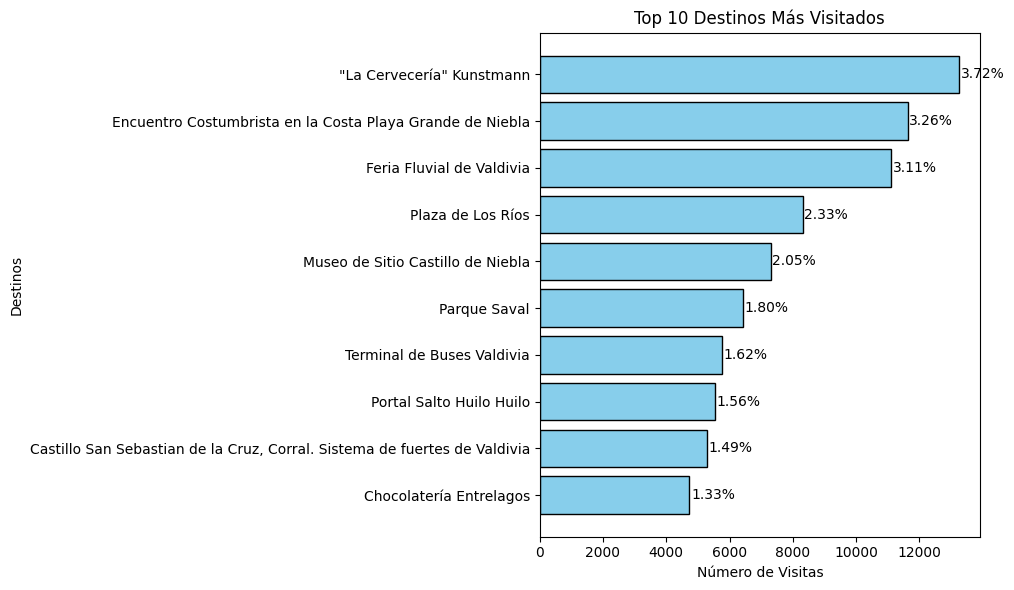

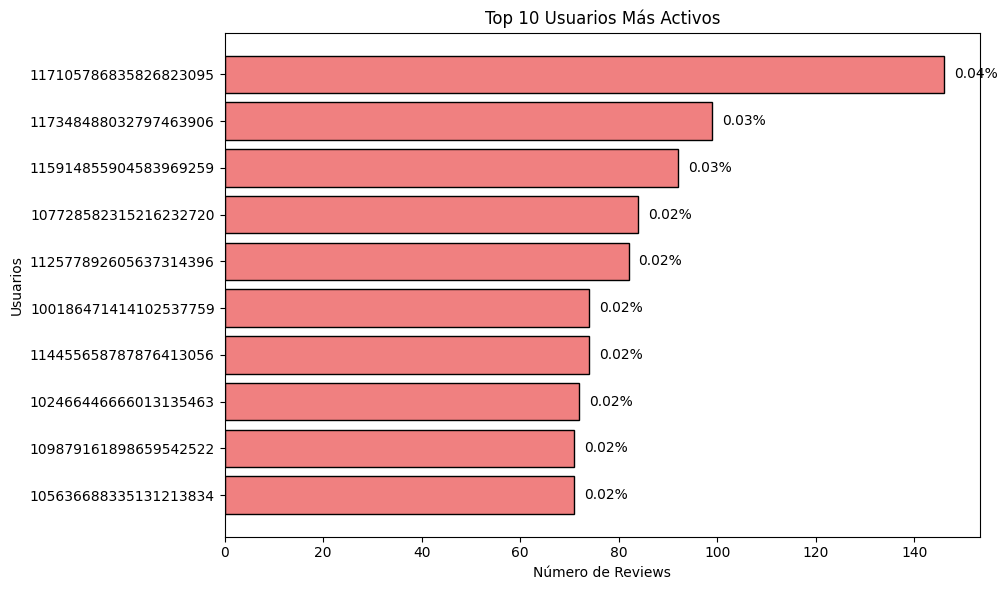

In [55]:

plt.figure(figsize=(10, 6))
plt.barh(top_destinos_con_porcentaje['Destino'], top_destinos_con_porcentaje['Visitas'], color='skyblue', edgecolor='black')
plt.xlabel('Número de Visitas')
plt.ylabel('Destinos')
plt.title('Top 10 Destinos Más Visitados')
plt.gca().invert_yaxis()  # Colocar el destino más popular arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (visitas, porcentaje) in enumerate(zip(top_destinos_con_porcentaje['Visitas'], top_destinos_con_porcentaje['Porcentaje (%)'])):
    plt.text(visitas + 50, i, f"{porcentaje:.2f}%", va='center')

plt.show()



# Gráfico de barras horizontales para usuarios con más reviews
plt.figure(figsize=(10, 6))
plt.barh(top_usuarios_con_porcentaje['Usuario'], top_usuarios_con_porcentaje['Reviews'], color='lightcoral', edgecolor='black')
plt.xlabel('Número de Reviews')
plt.ylabel('Usuarios')
plt.title('Top 10 Usuarios Más Activos')
plt.gca().invert_yaxis()  # Colocar el usuario más activo arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (reviews, porcentaje) in enumerate(zip(top_usuarios_con_porcentaje['Reviews'], top_usuarios_con_porcentaje['Porcentaje (%)'])):
    plt.text(reviews + 2, i, f"{porcentaje:.2f}%", va='center')

plt.show()



#### ¿Qué lugar visitan los usuarios más activos?

Analizamos cuáles son los destinos más frecuentados por el top 10 de usuarios que tienen la mayor cantidad de interacciones (reviews).

In [56]:
# Top 10 usuarios más activos
top_usuarios = df_base['id_usuario'].value_counts().head(10).index

# Filtrar los destinos visitados por los usuarios más activos
destinos_usuarios_activos = df_base[df_base['id_usuario'].isin(top_usuarios)]

# Contar las visitas de cada usuario a los destinos
destinos_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'place_name']).size().reset_index(name='visitas')

# Mostrar los destinos más visitados por los usuarios más activos
print("Destinos visitados por los usuarios más activos:")
print(destinos_por_usuario.sort_values(by=['id_usuario', 'visitas'], ascending=[True, False]))


Destinos visitados por los usuarios más activos:
                id_usuario                 place_name  visitas
0    100186471414102537759  "La Cervecería" Kunstmann        1
1    100186471414102537759           Aeródromo Pichoy        1
2    100186471414102537759             Arboretum UACh        1
3    100186471414102537759                 Bar Bundor        1
4    100186471414102537759      Bar Terraza Cervecera        1
..                     ...                        ...      ...
860  117348488032797463906                     Turbus        1
861  117348488032797463906     Vituperio Coffee & Bar        1
862  117348488032797463906              cafe del lago        1
863  117348488032797463906             casas amunantu        1
864  117348488032797463906          comidas Santa Ana        1

[865 rows x 3 columns]


In [57]:
# Obtener destinos únicos visitados por los usuarios más activos
destinos_unicos = destinos_usuarios_activos['place_name'].unique()

# Mostrar los destinos únicos
print(f"Cantidad de destinos únicos visitados por los usuarios más activos: {len(destinos_unicos)}")
print("\nDestinos únicos visitados por los usuarios más activos:")
print(destinos_unicos)


Cantidad de destinos únicos visitados por los usuarios más activos: 419

Destinos únicos visitados por los usuarios más activos:
['Gohan Sushi & Shrimps' 'Cafe El Molino' 'Parque Urbano El Bosque'
 'Hotel Melillanca' 'Fuente Valdiviana' 'Restaurant Don Floro'
 'Ranco Lake' 'Puente Caucau' 'Termas de Chihuío'
 'Terminal De Buses Paillaco'
 'Acotur Patagonia Chile - Agencia de Turismo & Viajes'
 'Hotel Spa Termas Llifen' 'Laguna de Lotos' 'Torreón del Barro'
 'Clover Irish Pub' 'Mirador Toledo'
 'Museo de Sitio Castillo San Pedro de Alcántara'
 'Panaderia Puritan Fundadores' 'Parrilla de Thor' 'Las Vigas Restaurante'
 'Torreón de los Canelos' 'Piscina Aqua Valdivia'
 'Terminal de Buses Valdivia'
 'Castillo San Sebastian de la Cruz, Corral. Sistema de fuertes de Valdivia'
 'Chocolatería Entrelagos' 'Costanera Arturo Prat' 'Playa Los Molinos'
 'Plaza de la República' 'La Última Frontera' 'El Growler' 'Bar Bundor'
 'Botellas Licorería' 'Mirador Rucatrehua' 'Parque Santa Inés'
 'Saltos Mirad

In [58]:
# Contar cuántos destinos de cada categoría han visitado los usuarios más activos
categorias_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'category']).size().reset_index(name='conteo')
print("Categorías más visitadas por los usuarios más activos:")
print(categorias_por_usuario.sort_values(by=['id_usuario', 'conteo'], ascending=[True, False]))


Categorías más visitadas por los usuarios más activos:
                id_usuario                category  conteo
12   100186471414102537759              restaurant      28
2    100186471414102537759                     bar      10
10   100186471414102537759                    park       8
15   100186471414102537759      tourist_attraction       6
3    100186471414102537759                    cafe       4
..                     ...                     ...     ...
178  117348488032797463906                   store       2
167  117348488032797463906              campground       1
168  117348488032797463906                  casino       1
169  117348488032797463906                    food       1
170  117348488032797463906  grocery_or_supermarket       1

[181 rows x 3 columns]


La categoria `Restaurant` domina como categoría más visitada. 

- El usuario más activo visitó 28 destinos en la categoría "restaurant", seguido por "bar" (10 destinos) y "park" (8 destinos).

- También hay visitas a categorías menos comunes como "cafe", "store" y "casino".

**Las categorías populares están relacionadas con actividades recreativas y gastronómicas, lo que sugiere que los usuarios más activos buscan experiencias sociales y culturales.**

### TOP 3 Categorias.

#### Analizamos la categoria `Restaurant`:

Top 10 destinos con las evaluaciones más altas en la categoría 'restaurant':
                           place_name  calificacion_promedio
2                    Avícola Agrícola                    5.0
256          Restaurante donde marlen                    5.0
78                           El ovejo                    5.0
102          Gustitos Pizza, Valdivia                    5.0
99   Gastronomia Mapuche Fresia Caman                    5.0
77                            El Yugo                    5.0
42             Club de Campo La Unión                    5.0
47         Coco pizza colombian coffe                    5.0
86                        FAKTORSABOR                    5.0
171                     Paradise food                    5.0

Top 10 destinos con las evaluaciones más bajas en la categoría 'restaurant':
                           place_name  calificacion_promedio
3                         Bar El Beto                    1.0
9                         Bon Appetit               

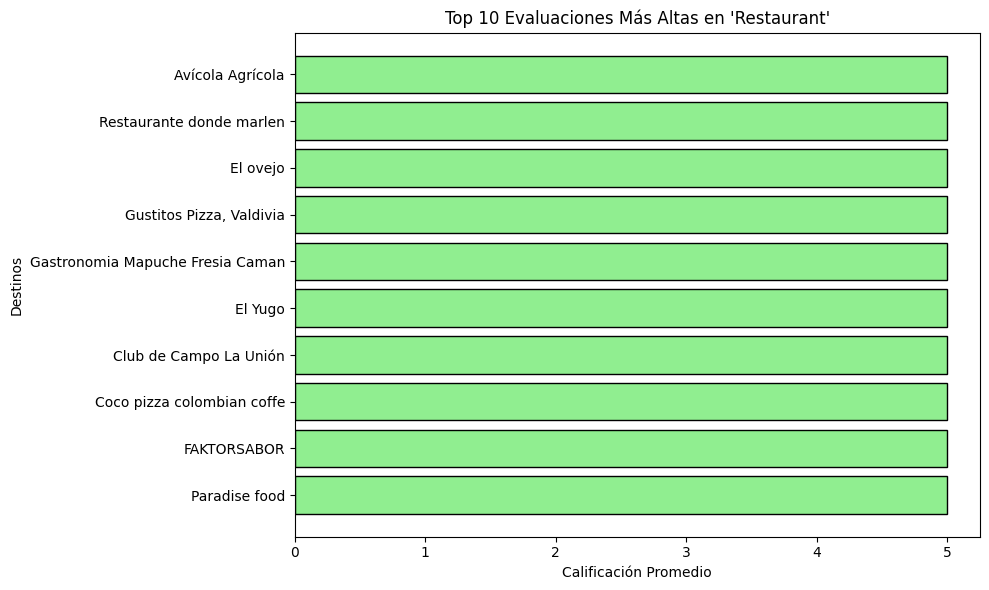

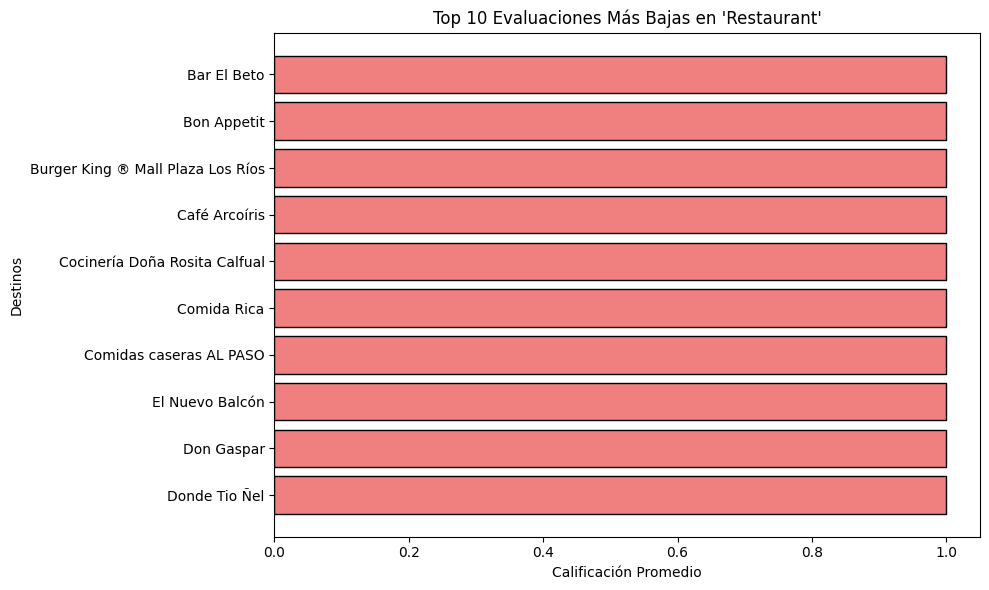

In [59]:
# Filtrar datos para la categoría "restaurant"
calificaciones_restaurant = df_base[df_base['category'] == 'restaurant']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_restaurant[calificaciones_restaurant['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_restaurant[calificaciones_restaurant['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'restaurant':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'restaurant':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'Restaurant'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'Restaurant'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Analizamos la categoria `Bar`:

Top 10 destinos con las evaluaciones más altas en la categoría 'bar':
                       place_name  calificacion_promedio
0                      11Restobar               5.000000
31  MYSTIKA CERVECERIA & PIZZERIA               5.000000
34                  Nina Café Bar               5.000000
28                Klandstinov Bar               5.000000
16         Cervecería Monte Viejo               4.916667
9                 Bodega Chumpeco               4.909091
37           Restaurant Pap Schop               4.900000
15     Cervecería Elfo Del Bosque               4.878205
6                 Barbudo Growler               4.872340
25        Fehlandt Cerveza Granel               4.869565

Top 10 destinos con las evaluaciones más bajas en la categoría 'bar':
                     place_name  calificacion_promedio
15       Cervecería Monte Viejo               1.000000
8               Bodega Chumpeco               1.000000
24      Fehlandt Cerveza Granel               1.000000
29          

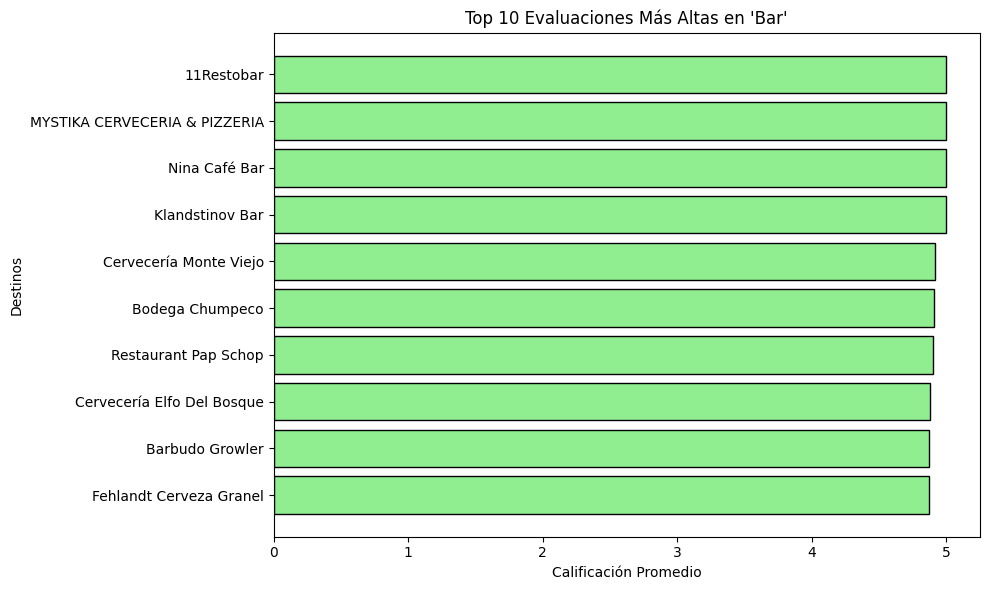

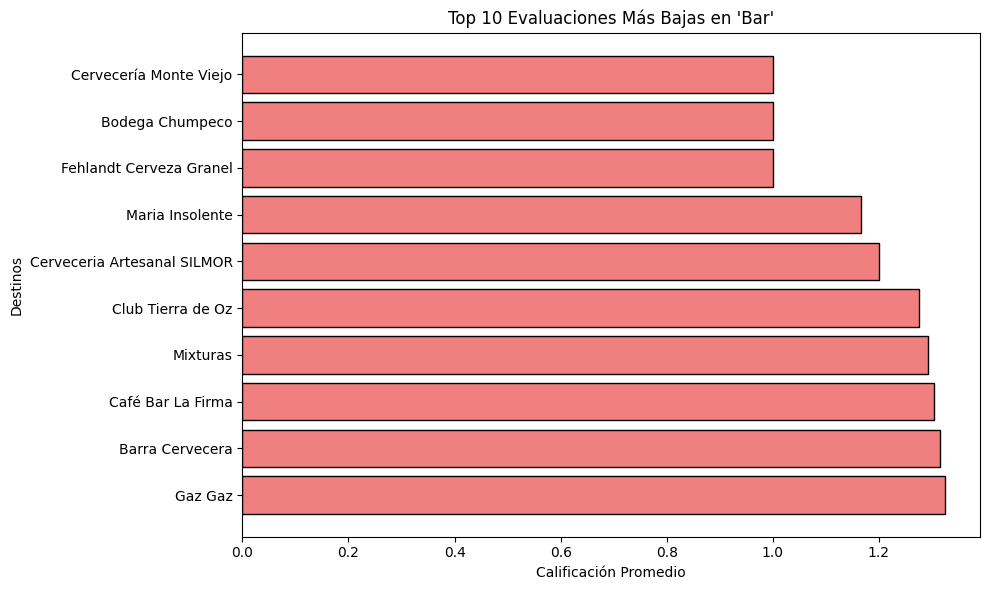

In [61]:

# Filtrar datos para la categoría "bar"
calificaciones_bar = df_base[df_base['category'] == 'bar']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_bar[calificaciones_bar['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_bar[calificaciones_bar['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'bar':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'bar':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'Bar'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'Bar'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Analizamos la categoria `Park`:

Top 10 destinos con las evaluaciones más altas en la categoría 'park':
                                  place_name  calificacion_promedio
2                  Bosque humedal Angachilla               5.000000
5                 Centro Ecoturismo Mallacan               5.000000
3                           Bosques de Relin               5.000000
45                           Plaza Los Pinos               5.000000
57                 Reserva Natural Pilunkura               5.000000
7   Escuela y Parque Agroecológico De Lumaco               5.000000
27                 Parque Saltos del Nilahue               4.969697
8                                Huilo Huilo               4.947867
25                           Parque Peumayen               4.941176
35            Parque de Insectos Ishiku Lemu               4.941176

Top 10 destinos con las evaluaciones más bajas en la categoría 'park':
                     place_name  calificacion_promedio
15       Cervecería Monte Viejo               1.000000

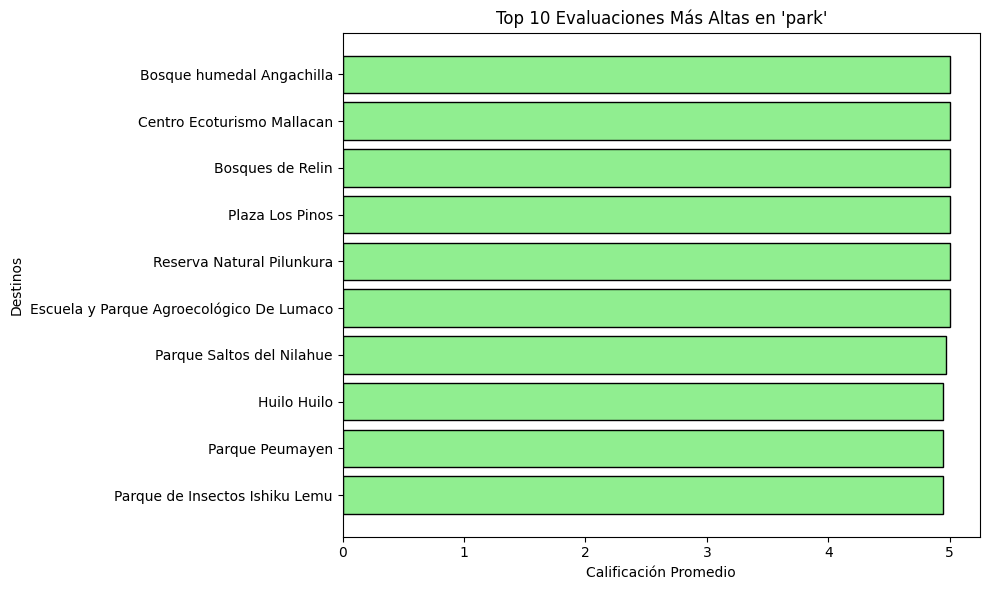

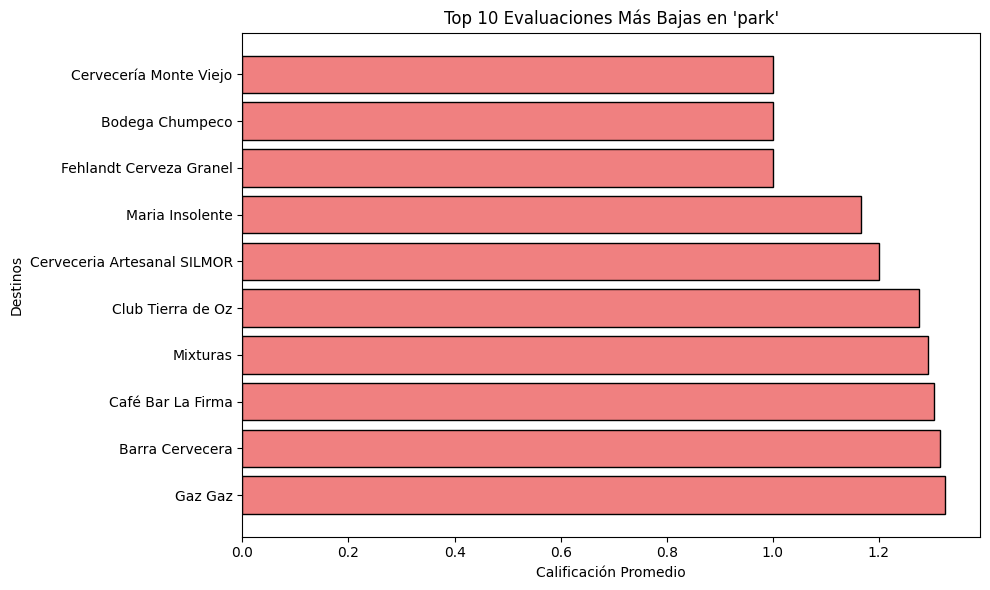

In [62]:
# Filtrar datos para la categoría "park"
calificaciones_park = df_base[df_base['category'] == 'park']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_park[calificaciones_park['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_bar[calificaciones_bar['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'park':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'park':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'park'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'park'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ¿Qué ciudad visitan los usuarios más activos?

In [64]:
ciudades_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'city']).size().reset_index(name='conteo')
print("Ciudades más visitadas por los usuarios más activos:")
ciudades_por_usuario.sort_values(by=['id_usuario', 'conteo'], ascending=[True, False])


Ciudades más visitadas por los usuarios más activos:


,id_usuario,city,conteo
10,100186471414102537759,Valdivia,61
9,100186471414102537759,San José de Mariquina,2
0,100186471414102537759,Curiñanco,1
1,100186471414102537759,Futrono,1
2,100186471414102537759,Liquine,1
...,...,...,...
89,117348488032797463906,Panguipulli,2
81,117348488032797463906,Corral,1
90,117348488032797463906,Puerto Nuevo,1
91,117348488032797463906,Puerto Squella,1


La ciudad `Valdivia` es la ciudad más visitada.

- El usuario más activo realizó 61 visitas a destinos en Valdivia, lo que la convierte en un punto de interés clave.

- Otras ciudades visitadas por los usuarios más activos incluyen "San José de Mariquina", "Corral" y "Panguipulli", pero con un número significativamente menor de visitas (1-2 destinos).

Calificación promedio general: 4.50

Calificaciones promedio de los usuarios más activos:
              id_usuario  calificacion_promedio
0  100186471414102537759               4.378378
1  102466446666013135463               4.541667
2  105636688335131213834               4.647887
3  107728582315216232720               4.214286
4  109879161898659542522               4.901408
5  112577892605637314396               4.841463
6  114455658787876413056               4.054054
7  115914855904583969259               4.739130
8  117105786835826823095               4.630137
9  117348488032797463906               4.868687


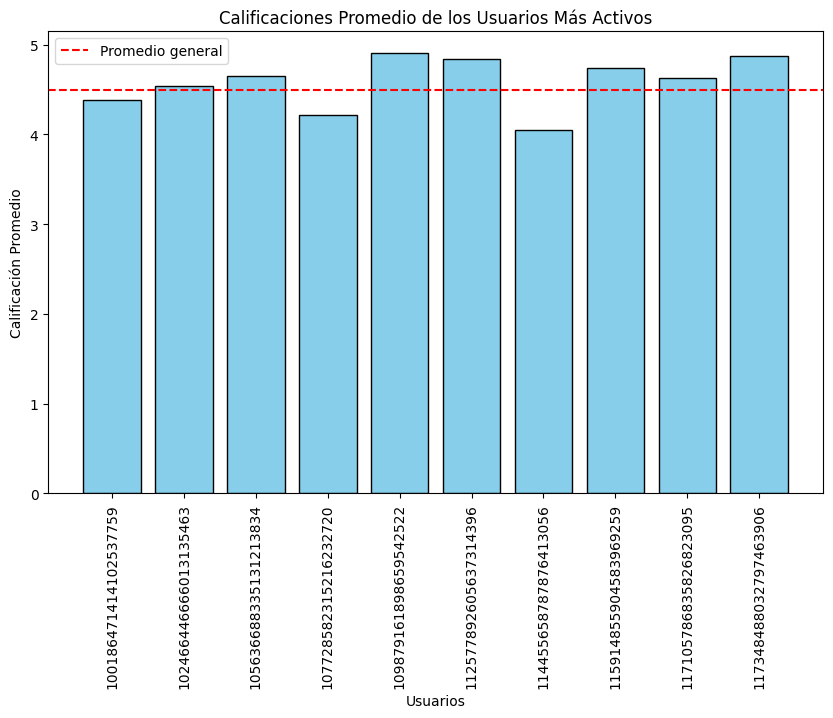

In [65]:
# Calcular el promedio de calificaciones (stars) de los usuarios más activos
calificaciones_por_usuario = destinos_usuarios_activos.groupby('id_usuario')['stars'].mean().reset_index(name='calificacion_promedio')

# Comparar con la calificación promedio general
calificacion_promedio_general = df_base['stars'].mean()

print(f"Calificación promedio general: {calificacion_promedio_general:.2f}")
print("\nCalificaciones promedio de los usuarios más activos:")
print(calificaciones_por_usuario)

# Visualización: comparar calificaciones promedio
plt.figure(figsize=(10, 6))
plt.bar(calificaciones_por_usuario['id_usuario'].astype(str), calificaciones_por_usuario['calificacion_promedio'], color='skyblue', edgecolor='black')
plt.axhline(calificacion_promedio_general, color='red', linestyle='--', label='Promedio general')
plt.xlabel("Usuarios")
plt.ylabel("Calificación Promedio")
plt.title("Calificaciones Promedio de los Usuarios Más Activos")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Las calificaciones promedio de los usuarios más activos varían entre 4.378 y 4.869, lo que indica diferencias leves. La mayoría de las calificaciones promedio están por encima del promedio general (representado por la línea roja en el gráfico), lo que sugiere que los usuarios más activos tienden a dar calificaciones más altas.

Es posible observar un sesgo positivo entre los usuarios más frecuentes, o también podría ser que los destinos frecuentados por estos usuarios generalmente reciben buenas calificaciones.

Se identifica un usuario cuya calificación promedio (4.378) está ligeramente por debajo de las demás, aunque sigue siendo positiva. **Este usuario podría ser considerado más crítico en comparación con los otros usuarios más activos y podría ser útil para futuros análisis.** `Usuario 17105786385826823095` y `Usuario 107285632152162720`.

Se Analiza las calificaciones bajas (≤2) y altas (≥4) realizadas por los usuarios más activos, y se identifica las siguientes observaciones clave:

Calificaciones bajas y altas por usuario:
               id_usuario               level_1  stars
0   100186471414102537759  calificaciones_bajas      4
1   100186471414102537759  calificaciones_altas     61
2   102466446666013135463  calificaciones_bajas      0
3   102466446666013135463  calificaciones_altas     70
4   105636688335131213834  calificaciones_bajas      1
5   105636688335131213834  calificaciones_altas     60
6   107728582315216232720  calificaciones_bajas      1
7   107728582315216232720  calificaciones_altas     74
8   109879161898659542522  calificaciones_bajas      0
9   109879161898659542522  calificaciones_altas     71
10  112577892605637314396  calificaciones_bajas      1
11  112577892605637314396  calificaciones_altas     78
12  114455658787876413056  calificaciones_bajas      4
13  114455658787876413056  calificaciones_altas     54
14  115914855904583969259  calificaciones_bajas      2
15  115914855904583969259  calificaciones_altas     89
16  1171057868358268230

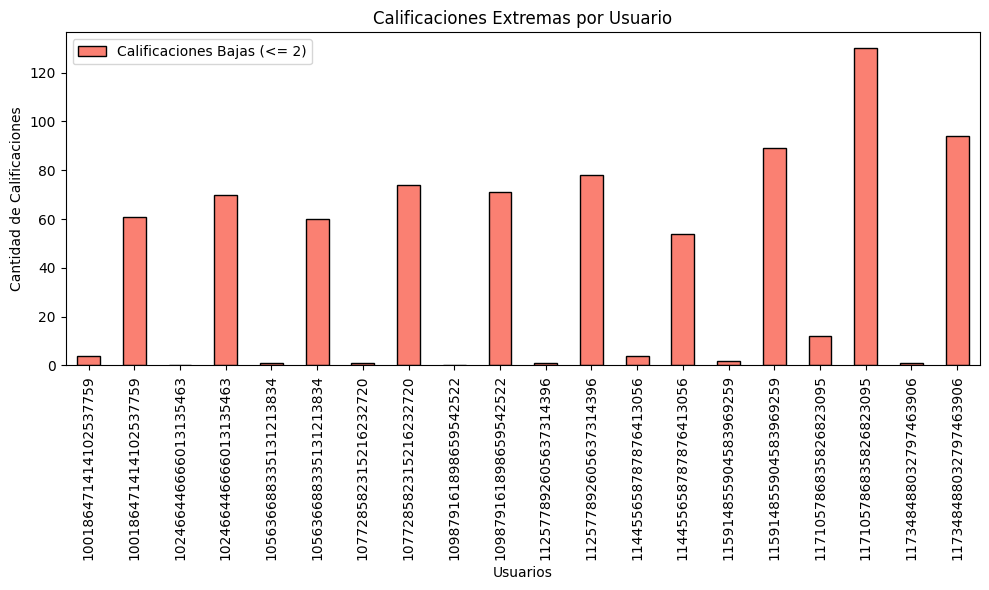

In [66]:
# Contar calificaciones bajas (1-2 estrellas) y altas (4-5 estrellas) por usuario
calificaciones_extremas = destinos_usuarios_activos.groupby('id_usuario')['stars'].apply(
    lambda x: pd.Series({
        'calificaciones_bajas': sum(x <= 2),
        'calificaciones_altas': sum(x >= 4)
    })
).reset_index()

print("Calificaciones bajas y altas por usuario:")
print(calificaciones_extremas)

# Visualizar proporción de calificaciones extremas
calificaciones_extremas.plot(
    x='id_usuario',
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['salmon', 'skyblue'],
    edgecolor='black'
)
plt.title("Calificaciones Extremas por Usuario")
plt.ylabel("Cantidad de Calificaciones")
plt.xlabel("Usuarios")
plt.legend(["Calificaciones Bajas (<= 2)", "Calificaciones Altas (>= 4)"])
plt.tight_layout()
plt.show()


`Usuarios con calificaciones bajas (≤2):`
La mayoría de los usuarios tienen muy pocas calificaciones bajas (entre 0 y 4). Esto indica que estos usuarios suelen otorgar calificaciones positivas o moderadas en lugar de críticas negativas.
Por ejemplo, algunos usuarios como 1024646466013135463 y 107285632152162720 no dieron ninguna calificación baja, mientras que otros, como 117105786385826823095, dieron hasta 12 calificaciones bajas.

`Usuarios con calificaciones altas (≥4):`Todos los usuarios tienen un número considerablemente mayor de calificaciones altas en comparación con calificaciones bajas. Algunos usuarios, como 117105786385826823095, destacan por haber otorgado hasta 130 calificaciones altas, lo que refleja un comportamiento altamente positivo.

#### Relación entre calificaciones bajas y categorías. Aca se consideran todos los usuarios, no solo el top 10 que mas calificaciones ha realizado.

Calificaciones bajas por categoría:
                  category  conteo
30              restaurant    5451
39      tourist_attraction    2020
28       point_of_interest    1906
20                 lodging    1838
26                    park    1060
3                      bar     866
34           shopping_mall     815
24                  museum     522
5                     cafe     521
25         natural_feature     357
14                    food     353
36                   store     286
9                   casino     259
16  grocery_or_supermarket     252
2                   bakery     235
6               campground     183
0                  airport     142
41           travel_agency     126
35                     spa     111
19            liquor_store      81
8               car_rental      76
11                  church      51
1           amusement_park      43
15             gas_station      39
42              university      26
22           meal_takeaway      10
4               boo

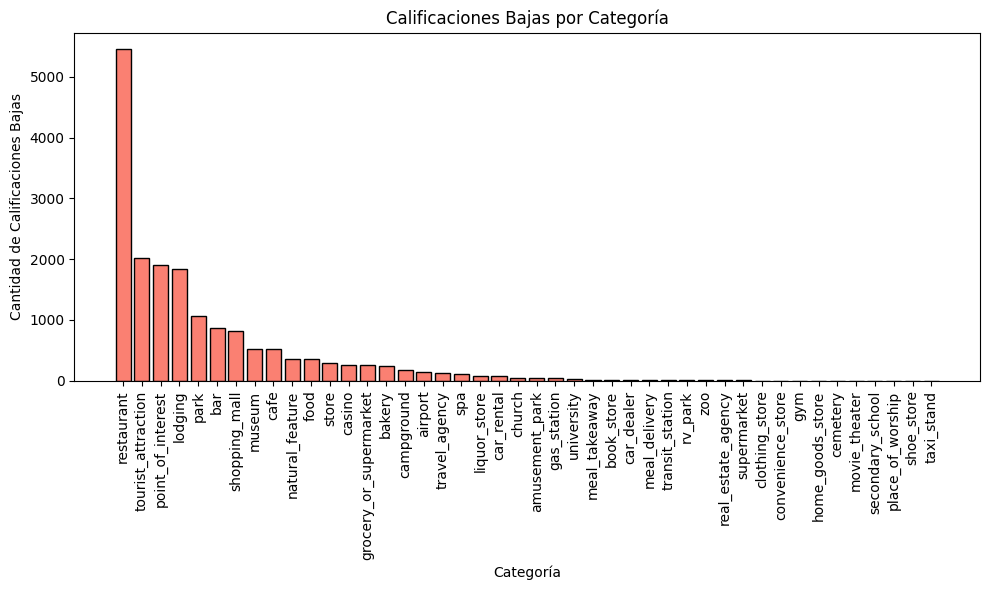

In [67]:
# Filtrar las calificaciones bajas (≤2)
calificaciones_bajas = df_base[df_base['stars'] <= 2]

# Contar cuántas calificaciones bajas tiene cada categoría
calificaciones_bajas_por_categoria = calificaciones_bajas.groupby('category').size().reset_index(name='conteo')

# Ordenar por el número de calificaciones bajas
calificaciones_bajas_por_categoria = calificaciones_bajas_por_categoria.sort_values(by='conteo', ascending=False)

# Mostrar los resultados
print("Calificaciones bajas por categoría:")
print(calificaciones_bajas_por_categoria)

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(calificaciones_bajas_por_categoria['category'], calificaciones_bajas_por_categoria['conteo'], color='salmon', edgecolor='black')
plt.title("Calificaciones Bajas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Calificaciones Bajas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Destinos con más calificaciones bajas:
                                            place_name  conteo
769                                  Plaza de Los Ríos     652
0                            "La Cervecería" Kunstmann     644
342  Encuentro Costumbrista en la Costa Playa Grand...     384
371                          Feria Fluvial de Valdivia     350
219                     Casino De Juegos Valdivia S.A.     259
771                              Plaza de la República     250
619                  Museo de Sitio Castillo de Niebla     219
3                                    AL YUGO RESTORANT     202
982                         Terminal de Buses Valdivia     194
253                            Chocolatería Entrelagos     192


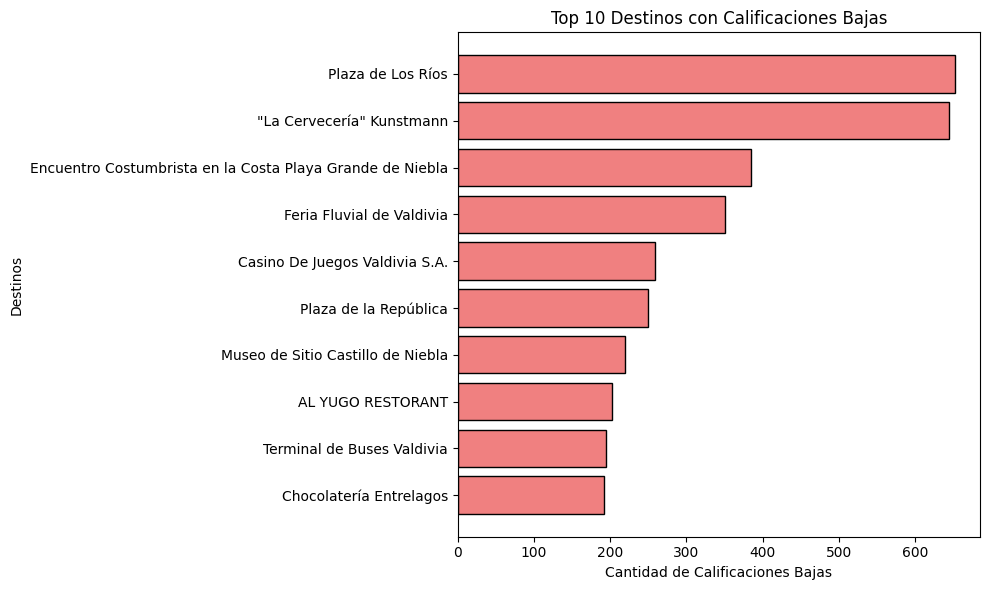

Destinos con más calificaciones bajas:
                                            place_name  conteo
769                                  Plaza de Los Ríos     652
0                            "La Cervecería" Kunstmann     644
342  Encuentro Costumbrista en la Costa Playa Grand...     384
371                          Feria Fluvial de Valdivia     350
219                     Casino De Juegos Valdivia S.A.     259
771                              Plaza de la República     250
619                  Museo de Sitio Castillo de Niebla     219
3                                    AL YUGO RESTORANT     202
982                         Terminal de Buses Valdivia     194
253                            Chocolatería Entrelagos     192


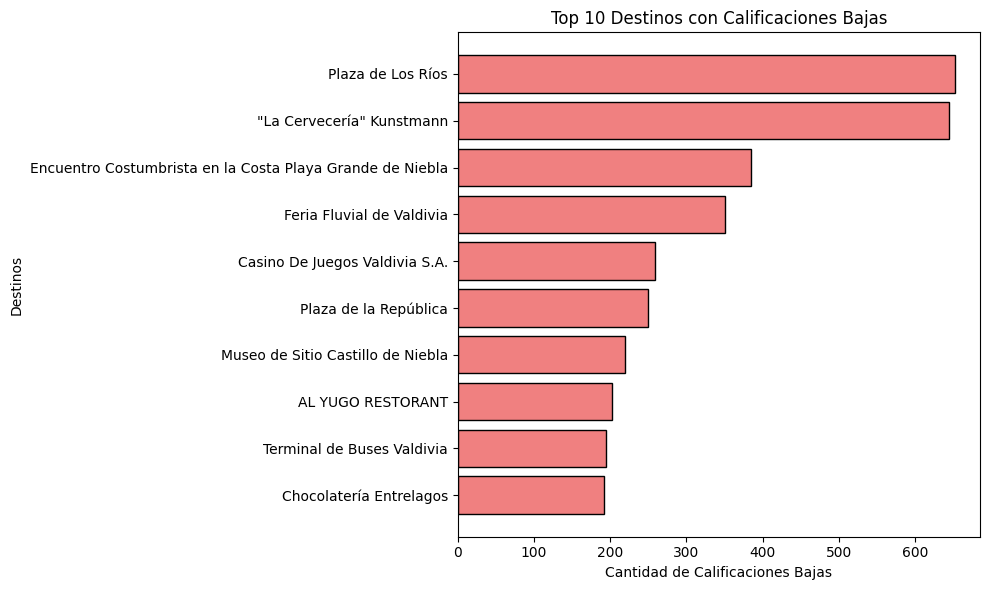

In [68]:
# Contar calificaciones bajas por destino
calificaciones_bajas_por_destino = calificaciones_bajas.groupby('place_name').size().reset_index(name='conteo')

# Ordenar por número de calificaciones bajas
calificaciones_bajas_por_destino = calificaciones_bajas_por_destino.sort_values(by='conteo', ascending=False).head(10)

# Mostrar los resultados
print("Destinos con más calificaciones bajas:")
print(calificaciones_bajas_por_destino)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(calificaciones_bajas_por_destino['place_name'], calificaciones_bajas_por_destino['conteo'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Destinos con Calificaciones Bajas")
plt.xlabel("Cantidad de Calificaciones Bajas")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Contar calificaciones altas por destino
calificaciones_bajas_por_destino = calificaciones_bajas.groupby('place_name').size().reset_index(name='conteo')

# Ordenar por número de calificaciones bajas
calificaciones_bajas_por_destino = calificaciones_bajas_por_destino.sort_values(by='conteo', ascending=False).head(10)

# Mostrar los resultados
print("Destinos con más calificaciones bajas:")
print(calificaciones_bajas_por_destino)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(calificaciones_bajas_por_destino['place_name'], calificaciones_bajas_por_destino['conteo'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Destinos con Calificaciones Bajas")
plt.xlabel("Cantidad de Calificaciones Bajas")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Es probable que la categoría más visitada, "restaurant", esté asociada principalmente con destinos en ciudades como Valdivia, que concentra una gran cantidad de actividades turísticas y gastronómicas.**

#### ¿Tienen un patrón de calificación específico los usuarios más activos?

Vemos una comparación entre las calificaciones promedio de los usuarios más activos y el promedio general.